In [1]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def get_avg_std(metric_list, percent=100, std_flag=False):
    mean_val = np.mean(metric_list)
    std_val = np.std(metric_list)
    if std_flag:
        return f"{mean_val*percent:.2f}±{std_val:.2f}"
    else:
        return np.round(mean_val*percent, 2)


def summarize_results(json_folder, std_flag=False):
    metrics_ls, metrics_ls_multi_hop = [], []

    for filename in sorted(os.listdir(json_folder)):
        if filename.endswith('.json') and 'multi_turn' not in filename:
            filepath = os.path.join(json_folder, filename)
            # print(filepath)
            with open(filepath, 'r') as file:
                metrics = json.load(file)
                parts = filename.split('_')
                domain = parts[0]
                topic = ' '.join(parts[1:-1])  
                edit_method = parts[-1].replace('.json', '')  

                results = {
                    "domain": domain,
                    "topic": topic,
                    "edit_method": edit_method,
                    # "model": model,
                    "efficacy_pre": get_avg_std([e['pre']['edit_acc'][0] for e in metrics]),
                    "efficacy_post": get_avg_std([e['post']['edit_acc'][0] for e in metrics]),
                    "rephrase_pre": get_avg_std([e['pre']['rephrase_acc'][0] for e in metrics]),
                    "rephrase_post": get_avg_std([e['post']['rephrase_acc'][0] for e in metrics]),
                    "yes_pre": get_avg_std([e['pre']['yes_questions']['yes_acc'][0] for e in metrics]),
                    "yes_post": get_avg_std([e['post']['yes_questions']['yes_acc'][0] for e in metrics]),
                    "no_pre": get_avg_std([e['pre']['no_questions']['no_acc'][0] for e in metrics]),
                    "no_post": get_avg_std([e['post']['no_questions']['no_acc'][0] for e in metrics]),
                    "mc_pre": get_avg_std([e['pre']['multiple_choice_questions']['multiple_choice_acc'][0] for e in metrics]),
                    "mc_post": get_avg_std([e['post']['multiple_choice_questions']['multiple_choice_acc'][0] for e in metrics]),
                    "reversed_pre": get_avg_std([e['pre']['reversed_relation_questions']['reversed_relation_acc'][0] for e in metrics]),
                    "reversed_post": get_avg_std([e['post']['reversed_relation_questions']['reversed_relation_acc'][0] for e in metrics]),
                    "locality_post": get_avg_std([e['post']['locality'][f'locality_acc'][0] for e in metrics]),
                }

                results_multi_hop = {
                    "domain": domain,
                    "topic": topic,
                    "edit_method": edit_method,
                    # "model": model,
                    "questions_2hop_pre": get_avg_std([e['pre']['questions_2hop']['2hop_acc'][0] for e in metrics]),
                    "questions_2hop_post": get_avg_std([e['post']['questions_2hop']['2hop_acc'][0] for e in metrics]),
                    "questions_3hop_pre": get_avg_std([e['pre']['questions_3hop']['3hop_acc'][0] for e in metrics]),
                    "questions_3hop_post": get_avg_std([e['post']['questions_3hop']['3hop_acc'][0] for e in metrics]),
                    "questions_4hop_pre": get_avg_std([e['pre']['questions_4hop']['4hop_acc'][0] for e in metrics]),
                    "questions_4hop_post": get_avg_std([e['post']['questions_4hop']['4hop_acc'][0] for e in metrics]),
                    "questions_5hop_pre": get_avg_std([e['pre']['questions_5hop']['5hop_acc'][0] for e in metrics]),
                    "questions_5hop_post": get_avg_std([e['post']['questions_5hop']['5hop_acc'][0] for e in metrics]),
                    "questions_6hop_pre": get_avg_std([e['pre']['questions_6hop']['6hop_acc'][0] for e in metrics]),
                    "questions_6hop_post": get_avg_std([e['post']['questions_6hop']['6hop_acc'][0] for e in metrics]),
                }
                metrics_ls.append(results)
                metrics_ls_multi_hop.append(results_multi_hop)
    df = pd.DataFrame(metrics_ls)
    df_multi_hop = pd.DataFrame(metrics_ls_multi_hop)
    # df['edit_method'] = pd.Categorical(df['edit_method'], ["ROME", "FT-M", "ICL"])
    # df['Gene_increase'] = df.apply(lambda x: x['Generalization_post'] - x['Generalization_pre'], axis=1)
    # df['Port_increase'] = df.apply(lambda x: x['Portability_post'] - x['Portability_pre'], axis=1)
    # return df[['edit_method', 'model', 'Reliability_pre', 'Reliability_post', 'Reli_increase', 'Generalization_pre', 
    #            'Generalization_post', 'Gene_increase', 'Portability_pre', 'Portability_post', 'Port_increase']]
    return df, df_multi_hop

In [5]:
json_folder = "../results/meta_llama_3_8b_instruct" 
for filename in sorted(os.listdir(json_folder)):
    if filename.endswith('.json') and 'multi_turn' not in filename:
        parts = filename.split('_')
        domain = parts[0]
        topic = ' '.join(parts[1:-1])  
        edit_method = parts[-1].replace('.json', '')  
        print(f'domain {domain:<25} topic: {topic:<25} edit_method: {edit_method}')

domain art                       topic: sculpture                 edit_method: FT-L
domain art                       topic: sculpture                 edit_method: FT-M
domain art                       topic: sculpture                 edit_method: GRACE
domain art                       topic: sculpture                 edit_method: ICL
domain art                       topic: sculpture                 edit_method: LoRA
domain art                       topic: sculpture                 edit_method: MEMIT
domain art                       topic: sculpture                 edit_method: ROME
domain business                  topic: brand                     edit_method: FT-L
domain business                  topic: brand                     edit_method: FT-M
domain business                  topic: brand                     edit_method: GRACE
domain business                  topic: brand                     edit_method: ICL
domain business                  topic: brand                     edit_meth

In [6]:
# move files between folders
import os
import shutil

# source_folder = "../results/meta_llama_3_8b_instruct"
# destination_folder = "../tmp/all_grace/old_meta_llama_3_8b_instruct_same_5_type_acc"
source_folder = "../tmp/all_grace/meta_llama_3_8b_instruct"
destination_folder = "../results/meta_llama_3_8b_instruct"

for filename in os.listdir(source_folder):
    if filename.endswith("GRACE.json"):
        source_path = os.path.join(source_folder, filename)
        destination_path = os.path.join(destination_folder, filename)
        
        shutil.move(source_path, destination_path)
        print(f"Moved {filename} to {destination_folder}")


# source_folder = "../results/mistral_7b_instruct_v0.3"
# destination_folder = "../tmp/all_grace/old_mistral_7b_instruct_v0.3_same_5_type_acc"
source_folder = "../tmp/all_grace/mistral_7b_instruct_v0.3"
destination_folder = "../results/mistral_7b_instruct_v0.3"

for filename in os.listdir(source_folder):
    if filename.endswith("GRACE.json"):
        source_path = os.path.join(source_folder, filename)
        destination_path = os.path.join(destination_folder, filename)
        
        shutil.move(source_path, destination_path)
        print(f"Moved {filename} to {destination_folder}")

print("File moving complete.")

Moved geography_volcano_GRACE.json to ../results/meta_llama_3_8b_instruct
Moved event_sport_GRACE.json to ../results/meta_llama_3_8b_instruct
Moved health_medication_GRACE.json to ../results/meta_llama_3_8b_instruct
Moved business_corporation_GRACE.json to ../results/meta_llama_3_8b_instruct
Moved human_entrepreneur_GRACE.json to ../results/meta_llama_3_8b_instruct
Moved event_film_GRACE.json to ../results/meta_llama_3_8b_instruct
Moved geography_glacier_GRACE.json to ../results/meta_llama_3_8b_instruct
Moved business_industry_GRACE.json to ../results/meta_llama_3_8b_instruct
Moved art_sculpture_GRACE.json to ../results/meta_llama_3_8b_instruct
Moved business_brand_GRACE.json to ../results/meta_llama_3_8b_instruct
Moved geography_forest_GRACE.json to ../results/meta_llama_3_8b_instruct
Moved human_scientist_GRACE.json to ../results/meta_llama_3_8b_instruct
Moved health_symptom_GRACE.json to ../results/meta_llama_3_8b_instruct
Moved entertainment_music_genre_GRACE.json to ../results/met

## Multi-turn

Traverse files under '../results/meta_llama_3_8b_instruct_multi_turn', and plot a line chart for all files, each with 2 lines, one for pre-edit, one for post-edit.

In [19]:
def plot_multi_turn_all(folder_path):
    plt.figure(figsize=(10, 6))
    
    colors = plt.cm.get_cmap('tab10')
    color_index = 0
    
    for filename in sorted(os.listdir(folder_path)):
        if filename.endswith('.json'):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r') as file:
                metrics = json.load(file)
            
            multi_turn_ls_pre, multi_turn_ls_post = [], []
            for e in metrics:
                multi_turn_ls_pre.append(e['pre']['edit_acc_multi_turn'])
                multi_turn_ls_post.append(e['post']['edit_acc_multi_turn'])
            multi_turn_ls_avg_pre = np.mean(multi_turn_ls_pre, axis=0)[1:]
            multi_turn_ls_avg_post = np.mean(multi_turn_ls_post, axis=0)[1:]
            
            edit_method = filename.split('_')[-1].replace('.json', '')
            color = colors(color_index)
            
            plt.plot(multi_turn_ls_avg_pre, label=f'{edit_method} (Pre-edit)', color=color)
            plt.plot(multi_turn_ls_avg_post, label=f'{edit_method} (Post-edit)', color=color, linestyle='--')
            
            color_index = (color_index + 1) % 10
    
    plt.xlabel('Turn')
    plt.ylabel('Edit Accuracy')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('Multi-turn Edit Accuracy for Different Methods')
    plt.tight_layout()
    plt.show()

plot_multi_turn_all('../results/meta_llama_3_8b_instruct_multi_turn')

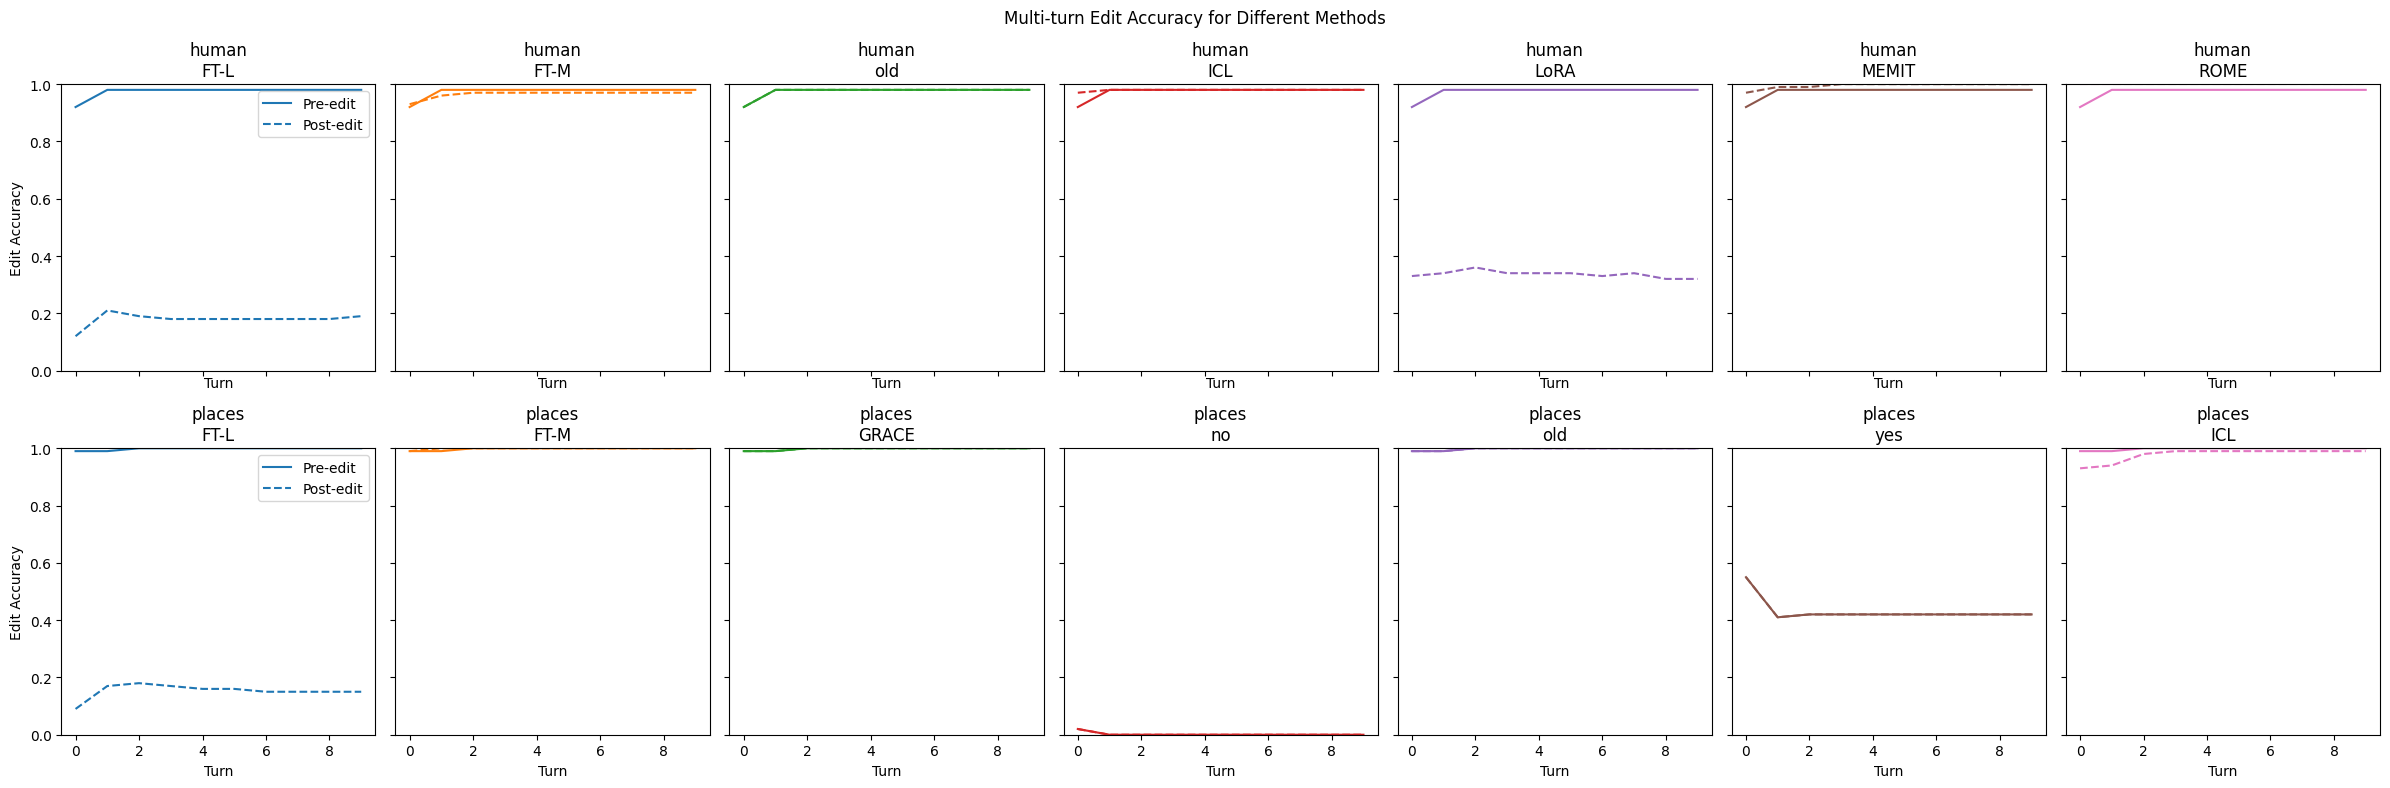

In [17]:
def plot_multi_turn_all(folder_path):
    # Get unique domains from the folder
    domains = set(filename.split('_')[0] for filename in os.listdir(folder_path) if filename.endswith('.json'))
    
    # Create two separate plots if there's more than one domain
    num_plots = 2 if len(domains) > 1 else 1
    fig, axes = plt.subplots(num_plots, 7, figsize=(24, 4*num_plots), sharex=True, sharey=True)
    fig.suptitle('Multi-turn Edit Accuracy for Different Methods')
    
    colors = plt.cm.get_cmap('tab10')
    
    for plot_idx, domain in enumerate(sorted(domains)[:2]):  # Limit to 2 domains max
        domain_files = [f for f in sorted(os.listdir(folder_path)) if f.startswith(domain) and f.endswith('.json')]
        
        for idx, filename in enumerate(domain_files[:7]):  # Limit to 7 methods per domain
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r') as file:
                metrics = json.load(file)
            
            edit_method = filename.split('_')[-1].replace('.json', '')
            
            multi_turn_ls_pre, multi_turn_ls_post = [], []
            for e in metrics:
                multi_turn_ls_pre.append(e['pre']['edit_acc_multi_turn'])
                multi_turn_ls_post.append(e['post']['edit_acc_multi_turn'])
            multi_turn_ls_avg_pre = np.mean(multi_turn_ls_pre, axis=0)[1:]  #
            multi_turn_ls_avg_post = np.mean(multi_turn_ls_post, axis=0)[1:]  #
            
            color = colors(idx)
            
            ax = axes[plot_idx][idx] if num_plots > 1 else axes[idx]
            ax.plot(multi_turn_ls_avg_pre, label='Pre-edit', color=color)
            ax.plot(multi_turn_ls_avg_post, label='Post-edit', color=color, linestyle='--')
            ax.set_title(f'{domain}\n{edit_method}')
            ax.set_xlabel('Turn')
            ax.set_ylim(0, 1)
            
            if idx == 0:
                ax.set_ylabel('Edit Accuracy')
                ax.legend()
    
    plt.tight_layout()
    plt.show()

plot_multi_turn_all('../results/mistral_7b_instruct_v0.3_multi_turn')

In [18]:
plot_multi_turn_all('../results/llama_2_7b_chat_hf_multi_turn')

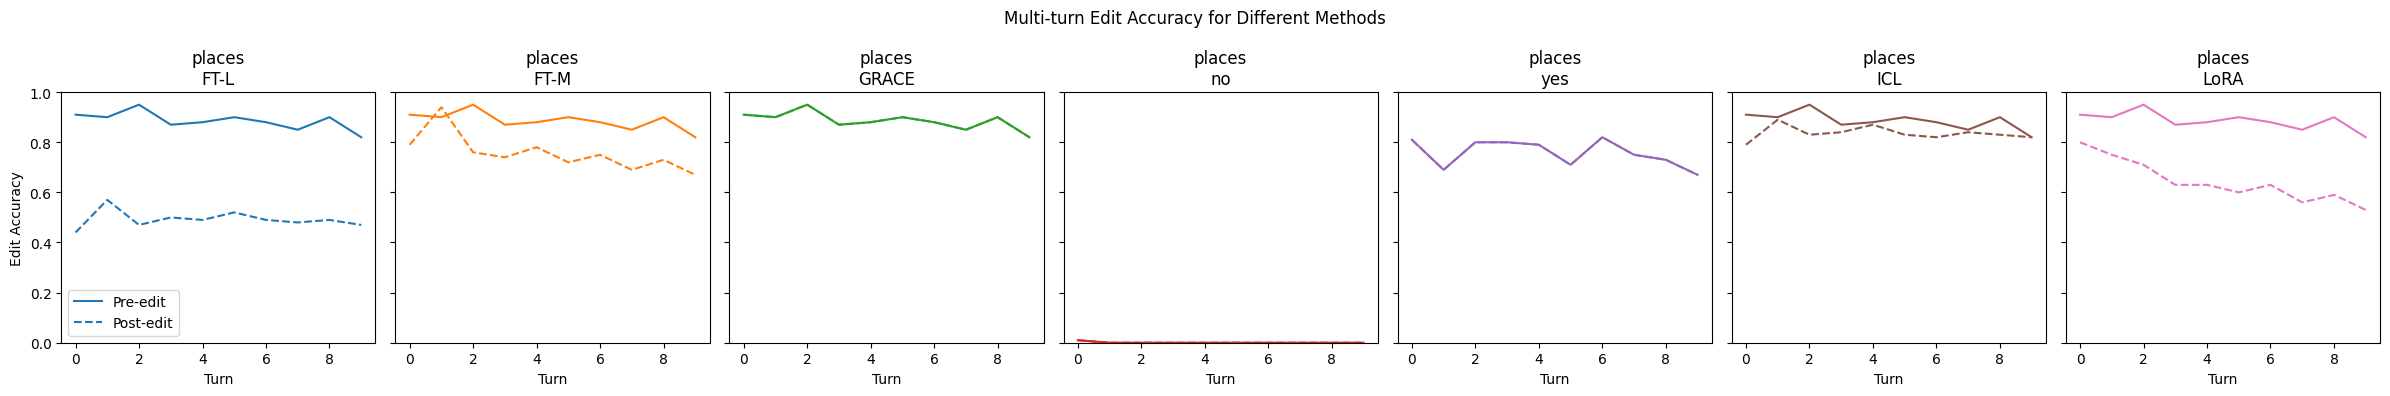

In [19]:
plot_multi_turn_all('../results/meta_llama_3_8b_instruct_multi_turn')

In [23]:
def plot_multi_turn_all(folder_path):
    # Get unique domains from the folder
    domains = set(filename.split('_')[0] for filename in os.listdir(folder_path) if filename.endswith('.json'))
    
    # Determine the number of plots and methods
    num_plots = min(len(domains), 2)  # Limit to 2 domains max
    num_methods = max(len([f for f in os.listdir(folder_path) if f.startswith(domain) and f.endswith('.json')]) for domain in domains)
    
    fig, axes = plt.subplots(num_plots, num_methods, figsize=(4*num_methods, 4*num_plots), sharex=True, sharey=True)
    fig.suptitle('Multi-turn Edit Accuracy for Different Methods')
    
    colors = plt.cm.get_cmap('tab10')
    
    for plot_idx, domain in enumerate(sorted(domains)[:num_plots]):
        domain_files = [f for f in sorted(os.listdir(folder_path)) if f.startswith(domain) and f.endswith('.json')]
        
        for idx, filename in enumerate(domain_files):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r') as file:
                metrics = json.load(file)
            
            edit_method = filename.split('_')[-1].replace('.json', '')
            
            multi_turn_ls_pre, multi_turn_ls_post = [], []
            for e in metrics:
                multi_turn_ls_pre.append(e['pre']['edit_acc_multi_turn'])
                multi_turn_ls_post.append(e['post']['edit_acc_multi_turn'])
            multi_turn_ls_avg_pre = np.mean(multi_turn_ls_pre, axis=0)[1:]
            multi_turn_ls_avg_post = np.mean(multi_turn_ls_post, axis=0)[1:]
            
            color = colors(idx % 10)  # Cycle through 10 colors
            
            if num_plots == 1 and num_methods == 1:
                ax = axes
            elif num_plots == 1:
                ax = axes[idx]
            elif num_methods == 1:
                ax = axes[plot_idx]
            else:
                ax = axes[plot_idx][idx]
            
            ax.plot(multi_turn_ls_avg_pre, label='Pre-edit', color=color)
            ax.plot(multi_turn_ls_avg_post, label='Post-edit', color=color, linestyle='--')
            ax.set_title(f'{domain}\n{edit_method}')
            ax.set_xlabel('Turn')
            ax.set_ylim(0, 1)
            
            if idx == 0:
                ax.set_ylabel('Edit Accuracy')
                ax.legend()
    
    # Hide unused subplots
    if num_plots == 1:
        for j in range(idx+1, num_methods):
            if num_methods == 1:
                axes.axis('off')
            else:
                axes[j].axis('off')
    else:
        for i in range(num_plots):
            for j in range(len(domain_files), num_methods):
                axes[i][j].axis('off')
    
    plt.tight_layout()
    plt.show()

plot_multi_turn_all('../results/meta_llama_3_8b_instruct_multi_turn')

In [ ]:
with open('../tmp/tmp2_places_country_ROME_meta_llama_3.1_8b_instruct_results.json', 'r') as file:
    metrics = json.load(file)
metrics[0]

{'pre': {'edit_acc': 0,
  'edit_output': 'Bechuanaland',
  'edit_acc_multi_turn': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  'edit_output_multi_turn': ['Bechuanaland',
   'Yes',
   'Yes',
   'Yes',
   'Yes',
   'Yes',
   'Yes',
   'Yes',
   'Yes',
   'Yes',
   'Yes'],
  'locality': {'locality_output': ['Gaborone']},
  'portability': {},
  'yes_questions': {'yes_acc': [1], 'yes_output': ['Yes']},
  'no_questions': {'no_acc': [0], 'no_output': ['Yes']},
  'multiple_choice_questions': {'multiple_choice_acc': [0],
   'multiple_choice_output': ['Bechuanaland']},
  'reversed_relation_questions': {'reversed_relation_acc': [0],
   'reversed_relation_output': ['Ireland']},
  'questions_2hop': {'2hop_acc': [1], '2hop_output': ['South Africa']},
  'questions_3hop': {'3hop_acc': [0], '3hop_output': ['South Africa']},
  'questions_4hop': {'4hop_acc': [0], '4hop_output': ['English']},
  'questions_5hop': {'5hop_acc': [0], '5hop_output': ['South Africa']},
  'questions_6hop': {'6hop_acc': [1], '6hop_output

In [20]:
def plot_multi_turn(metrics):  # plot a single json file
    multi_turn_ls_pre, multi_turn_ls_post = [], []
    for e in metrics:
        multi_turn_ls_pre.append(e['pre']['edit_acc_multi_turn'])
        multi_turn_ls_post.append(e['post']['edit_acc_multi_turn'])
    multi_turn_ls_avg_pre = np.mean(multi_turn_ls_pre, axis=0)[1:]
    multi_turn_ls_avg_post = np.mean(multi_turn_ls_post, axis=0)[1:]

    # plt.figure(figsize=(10, 6))
    plt.plot(multi_turn_ls_avg_pre, label='Pre-edit')
    plt.plot(multi_turn_ls_avg_post, label='Post-edit')
    plt.xlabel('Turn')
    plt.ylabel('Edit Accuracy')
    plt.legend()
    plt.show()
    
with open('../tmp/multi_turn_1_places_country_ROME_meta_llama_3.1_8b_instruct.json', 'r') as file:
    metrics = json.load(file)
plot_multi_turn(metrics)

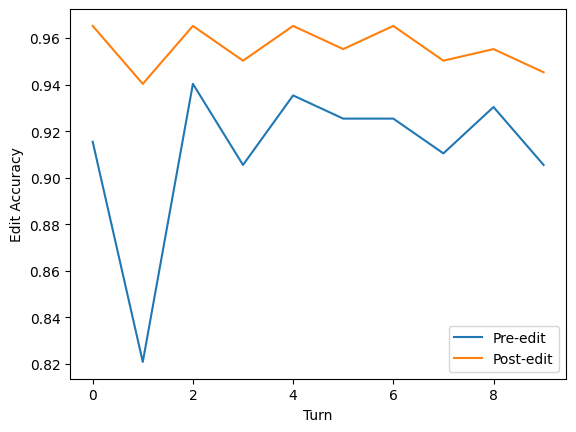

In [21]:
with open('../tmp/multi_turn_2_places_country_ROME_meta_llama_3.1_8b_instruct.json', 'r') as file:
    metrics = json.load(file)
plot_multi_turn(metrics)

## Table Summary

In [56]:
df, df_multi_hop = summarize_results("../results/meta_llama_3_8b_instruct")
df.sort_values(by=['topic', 'edit_method'])

domain   topic edit_method  efficacy_pre  efficacy_post  \
28   entertainment   anime        FT-L           0.0           42.0   
29   entertainment   anime        FT-M           0.0           72.0   
30   entertainment   anime       GRACE           1.0          100.0   
31   entertainment   anime         ICL           0.0           97.0   
32   entertainment   anime        LoRA           0.0           87.0   
..             ...     ...         ...           ...            ...   
135          human  writer       GRACE           0.0          100.0   
136          human  writer         ICL           0.0           96.0   
137          human  writer        LoRA           0.0           90.0   
138          human  writer       MEMIT           0.0           78.0   
139          human  writer        ROME           0.0           78.0   

     rephrase_pre  rephrase_post  yes_pre  yes_post  no_pre  no_post  mc_pre  \
28            7.0           48.0     63.0      30.0    22.0     10.0    24.0   
29            7.0           71.0     63.0      50.0    22.0     16.0    24.0   
30            3.0            3.0     63.0      63.0    22.0     22.0    24.0   
31            7.0           97.0     63.0      98.0    22.0     83.0    24.0   
32            7.0           89.0     63.0      78.0    22.0     11.0    24.0   
..            ...            ...      ...       ...     ...      ...     ...   
135           2.0            1.0     66.0      66.0    22.0     22.0    40.0   
136           4.0           97.0     66.0      89.0    22.0     76.0    40.0   
137           4.0           84.0     66.0      69.0    22.0     30.0    40.0   
138           4.0           75.0     66.0      72.0    22.0     38.0    40.0   
139           4.0           69.0     66.0      83.0    22.0     40.0    40.0   

     mc_post  reversed_pre  reversed_post  locality_post  
28      25.0           2.0            0.0            4.0  
29      24.0           2.0            0.0           39.0  
30      24.0           2.0            2.0          100.0  
31      94.0           2.0           63.0           46.0  
32      57.0           2.0            5.0           14.0  
..       ...           ...            ...            ...  
135     40.0           7.0            7.0          100.0  
136     92.0           7.0           84.0           60.0  
137     64.0           7.0            3.0           31.0  
138     72.0           7.0            1.0           18.0  
139     74.0           7.0            2.0           25.0  

[182 rows x 16 columns]

In [7]:
df, df_multi_hop = summarize_results("../results/meta_llama_3_8b_instruct")
df[df['edit_method']=='GRACE']

domain                 topic edit_method  efficacy_pre  \
2              art             sculpture       GRACE           0.0   
9         business                 brand       GRACE           0.0   
16        business           corporation       GRACE           0.0   
23        business              industry       GRACE           0.0   
30   entertainment                 anime       GRACE           0.0   
37   entertainment           music genre       GRACE           0.0   
44   entertainment                  song       GRACE           0.0   
51           event                  film       GRACE           0.0   
58           event               history       GRACE           0.0   
65           event                 sport       GRACE           0.0   
72       geography                forest       GRACE           0.0   
79       geography               glacier       GRACE           0.0   
86       geography               volcano       GRACE           0.0   
93          health               disease       GRACE           0.0   
100         health            medication       GRACE           0.0   
107         health               symptom       GRACE           0.0   
114          human               athlete       GRACE           0.0   
121          human          entrepreneur       GRACE           0.0   
128          human             scientist       GRACE           0.0   
135          human                writer       GRACE           0.0   
142         places                  city       GRACE           0.0   
149         places               country       GRACE           0.0   
156         places              landmark       GRACE           0.0   
163     technology              database       GRACE           0.0   
170     technology  programming language       GRACE           0.0   
177     technology              software       GRACE           0.0   

     efficacy_post  rephrase_pre  rephrase_post  yes_pre  yes_post  no_pre  \
2            99.00         12.00           3.00    61.00     10.00   26.00   
9            99.00         12.00           3.00    62.00     11.00   22.00   
16           98.89          5.56           0.00    62.22      7.78   14.44   
23          100.00         18.37          15.31    88.78     16.33   26.53   
30          100.00          7.00           3.00    63.00     17.00   22.00   
37           99.00         18.00           6.00    80.00      9.00   23.00   
44           98.00         14.00           1.00    73.00      9.00   24.00   
51          100.00          9.52           4.76    52.38     14.29   23.81   
58           97.14         17.14           1.43    71.43      7.14   15.71   
65          100.00         16.22           2.70    72.97     16.22   32.43   
72          100.00         32.00           2.00    86.00     31.00   26.00   
79          100.00         38.33           1.67    80.00     30.00   20.00   
86           84.00         17.00           1.00    64.00      8.00   33.00   
93          100.00         12.00           2.00    53.00      4.00   28.00   
100         100.00          8.00           0.00    84.00      4.00   20.00   
107         100.00         19.23           3.85    46.15      3.85   42.31   
114          99.00          8.00           0.00    70.00      8.00   20.00   
121         100.00          7.00           0.00    79.00      7.00   21.00   
128         100.00          6.00           2.00    80.00     12.00   30.00   
135         100.00          4.00           2.00    66.00      9.00   22.00   
142         100.00         12.00           1.00    39.00      4.00   48.00   
149         100.00         19.00           2.00    61.00     10.00   42.00   
156         100.00         12.00           3.00    60.00      8.00   41.00   
163         100.00          8.54           2.44    73.17     23.17   29.27   
170         100.00         19.00           2.00    61.00     15.00   36.00   
177          99.00          4.00           4.00    77.00     24.00   23.00   

     no_post  

In [ ]:
df_tmp, _ = summarize_results("../tmp/all_grace/meta_llama_3_8b_instruct")
df_tmp

## Efficacy

In [4]:
def plot_efficacy(df):
    # plot the efficacy by topic and edit method
    plt.figure(figsize=(15, 5))

    # Create a custom color palette
    colors = sns.color_palette("husl", n_colors=len(df.edit_method.unique()))
    ax = sns.barplot(x='topic', y='efficacy_post', hue='edit_method', data=df, palette=colors, alpha=0.7)

    plt.legend(bbox_to_anchor=(0.5, 1.07), loc='lower center', ncol=len(df.edit_method.unique())) # title='Edit Method', 
    plt.title('Efficacy by Topic and Edit Method')
    plt.xlabel('Topic')
    plt.ylabel('Efficacy Post')
    plt.xticks(rotation=20, ha='right')  # Rotate x-axis labels for better readability

    # Add value labels on top of each bar
    # for container in ax.containers:
    #     ax.bar_label(container, padding=3)  # , rotation=90

    plt.tight_layout()
    plt.show()

df, df_multi_hop = summarize_results("../results/meta_llama_3_8b_instruct")
# df.sort_values(by=['topic', 'edit_method'])
plot_efficacy(df)

In [4]:
def plot_efficacy(df, name):
    plt.figure(figsize=(15, 5))
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'brown']
    order = ['FT-L', 'FT-M', 'MEMIT', 'ROME', 'LoRA', 'ICL', 'GRACE']  # Use the specified order
    ax = sns.barplot(x='topic', y='efficacy_post', hue='edit_method', data=df, palette=colors, alpha=0.5, hue_order=order)
    plt.legend(bbox_to_anchor=(0.5, 1.01), loc='lower center', ncol=len(order))  # title='Edit Method',
    # plt.title('Efficacy by Topic and Edit Method')
    plt.xlabel('')
    plt.ylabel('Efficacy')
    plt.xticks(rotation=25, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.savefig(f'../results/figs/plot_efficacy_{name}.pdf')
    plt.show()
df, df_multi_hop = summarize_results("../results/llama_2_7b_chat_hf")
plot_efficacy(df, 'llama_2_7b')

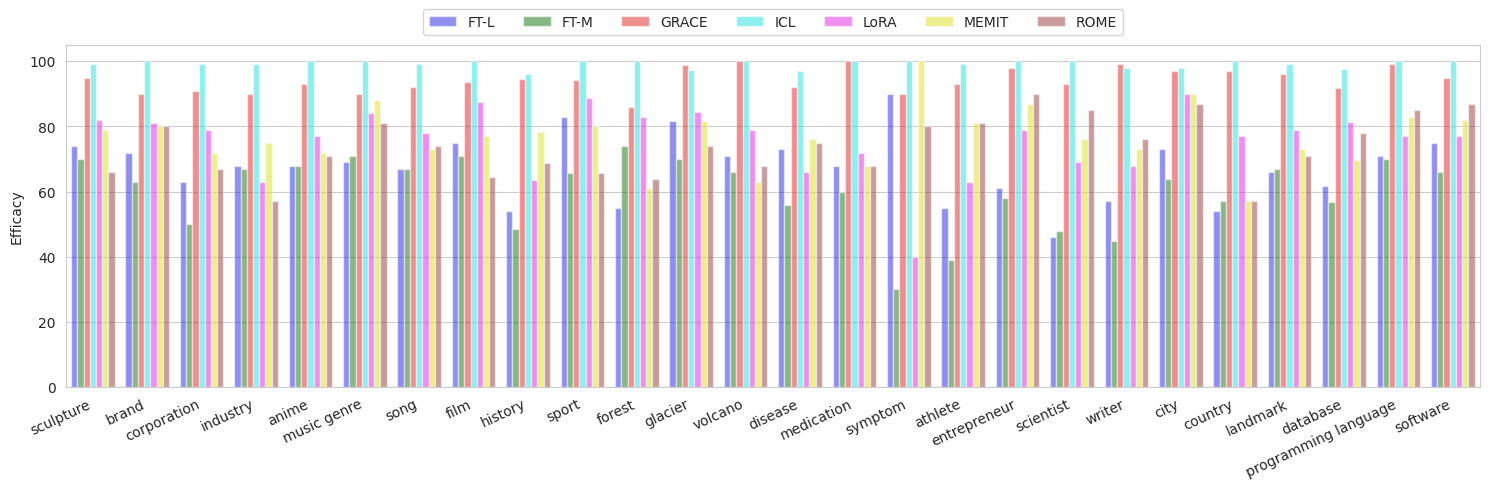

In [27]:
# plot with lines above
def plot_efficacy(df, name):
    plt.figure(figsize=(15, 5))
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'brown']
    ax = sns.barplot(x='topic', y='efficacy_post', hue='edit_method', data=df, palette=colors, alpha=0.5)
    
    # Add lines connecting the tops of bars for each edit method
    # for i, method in enumerate(df['edit_method'].unique()):
    #     method_data = df[df['edit_method'] == method]
    #     x = range(len(method_data))
    #     y = method_data['efficacy_post']
    #     plt.plot(x, y, color=colors[i], linewidth=0.5, marker='o', markersize=1)
    
    plt.legend(bbox_to_anchor=(0.5, 1.01), loc='lower center', ncol=len(df.edit_method.unique()))  # title='Edit Method',
    # plt.title('Efficacy by Topic and Edit Method')
    plt.xlabel('')
    plt.ylabel('Efficacy')
    plt.xticks(rotation=25, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.savefig(f'../results/figs/plot_efficacy_{name}.pdf')
    plt.show()

df, df_multi_hop = summarize_results("../results/llama_2_7b_chat_hf")
plot_efficacy(df, 'llama_2_7b')

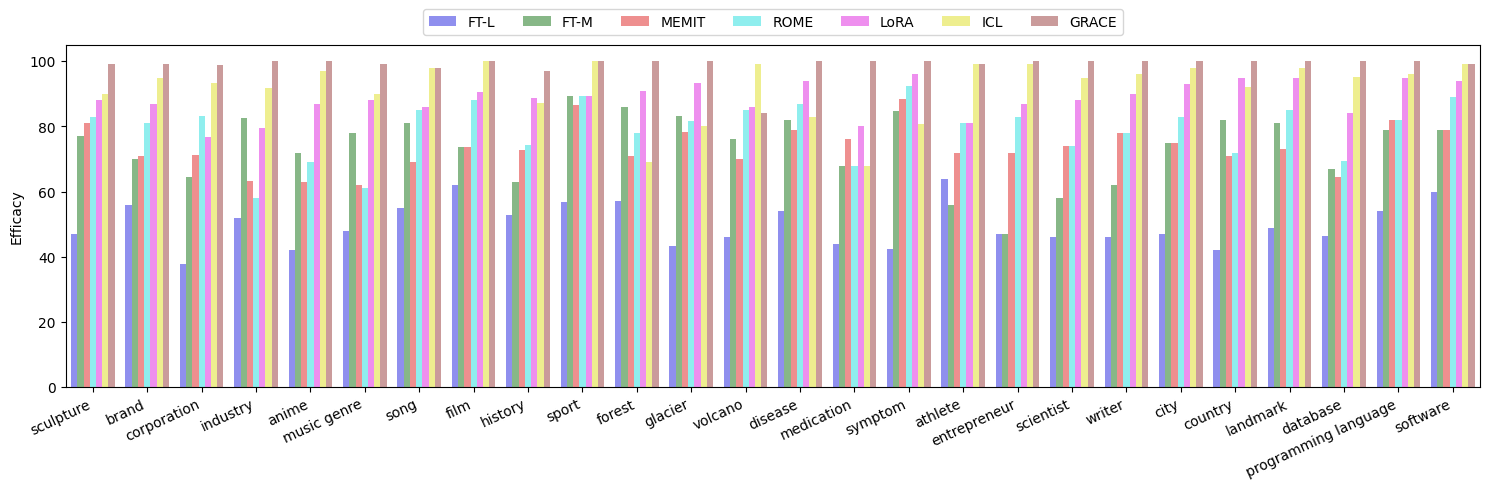

In [5]:
df, df_multi_hop = summarize_results("../results/meta_llama_3_8b_instruct")
plot_efficacy(df, 'llama_3_8b')

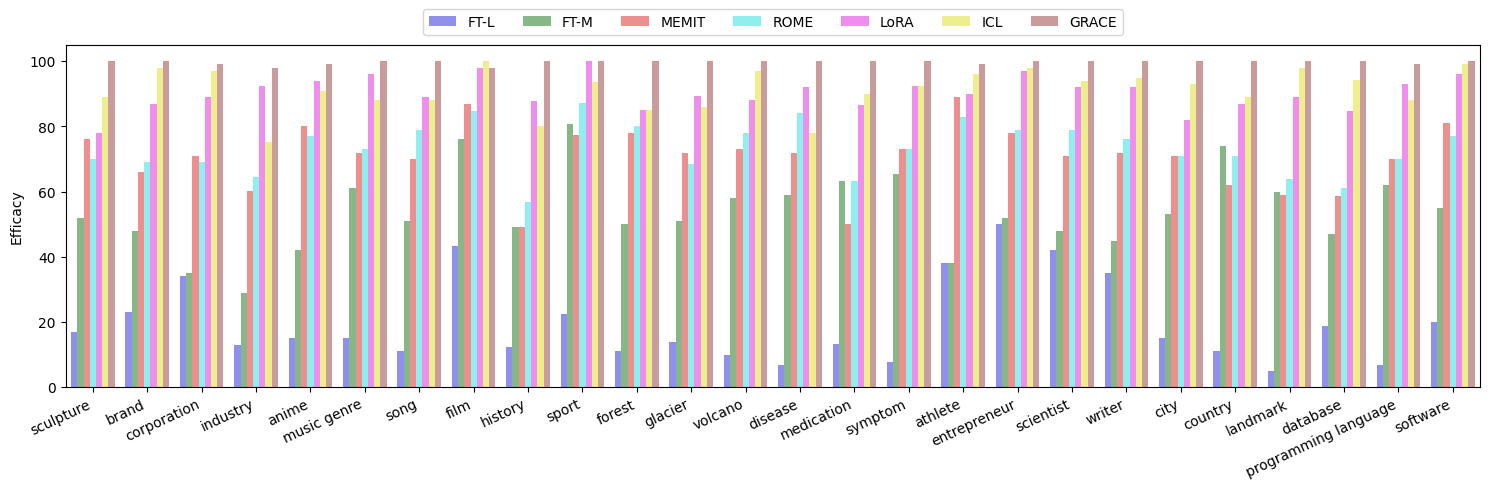

In [6]:
df, df_multi_hop = summarize_results("../results/mistral_7b_instruct_v0.3")
plot_efficacy(df, 'mistral_7b')

/tmp/ipykernel_2970651/3636824228.py:7: UserWarning: The palette list has more values (14) than needed (7), which may not be intended.
  ax = sns.barplot(x='topic', y='efficacy_post', hue='edit_method', data=df, palette=colors, alpha=0.5)


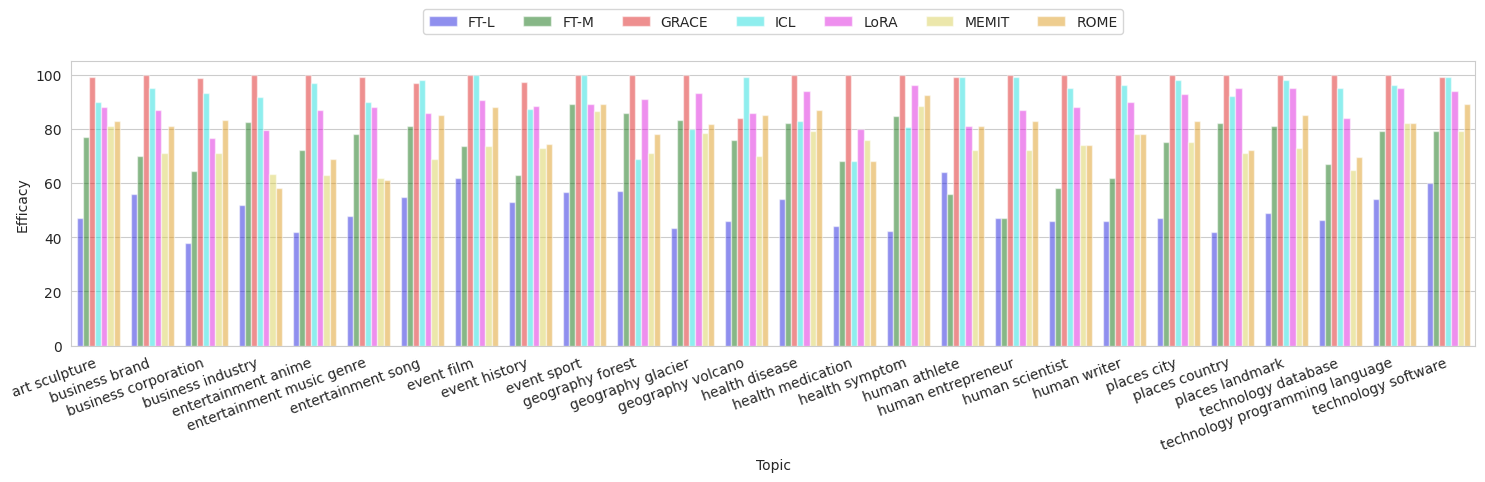

In [ ]:
def plot_efficacy(df):
    plt.figure(figsize=(15, 5))
    # colors = sns.color_palette("husl", n_colors=len(df.edit_method.unique()))
    # colors = sns.color_palette("pastel", n_colors=len(df.edit_method.unique()))
    # colors = sns.color_palette("colorblind", n_colors=len(df.edit_method.unique()))
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', '#F0E442', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'teal', 'navy']
    ax = sns.barplot(x='topic', y='efficacy_post', hue='edit_method', data=df, palette=colors, alpha=0.5)

    plt.legend(bbox_to_anchor=(0.5, 1.07), loc='lower center', ncol=len(df.edit_method.unique()))  # title='Edit Method',
    # plt.title('Efficacy by Topic and Edit Method')
    plt.xlabel('Topic')
    plt.ylabel('Efficacy')
    plt.xticks(rotation=20, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

plot_efficacy(df)  

In [42]:
def plot_efficacy_mod(df):
    plt.figure(figsize=(15, 5))
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', '#F0E442', 'orange']#, 'purple', 'brown', 'pink', 'gray', 'olive', 'teal', 'navy'
    
    # Ensure we have enough colors for all edit methods
    n_methods = len(df['edit_method'].unique())
    if n_methods > len(colors):
        colors = sns.color_palette("husl", n_colors=n_methods)
    
    ax = sns.barplot(x='topic', y='efficacy_post', hue='edit_method', data=df, palette=colors[:n_methods])
    
    # Adjust bar properties
    for i, bar in enumerate(ax.patches):
        bar.set_alpha(0.5)
        bar.set_edgecolor(colors[i % n_methods])
        bar.set_linewidth(1)

    plt.legend(bbox_to_anchor=(0.5, 1.07), loc='lower center', ncol=len(df['edit_method'].unique()))
    plt.xlabel('Topic')
    plt.ylabel('Efficacy')
    plt.xticks(rotation=20, ha='right')
    plt.tight_layout()
    plt.show()

plot_efficacy_mod(df)

## Multi-hop

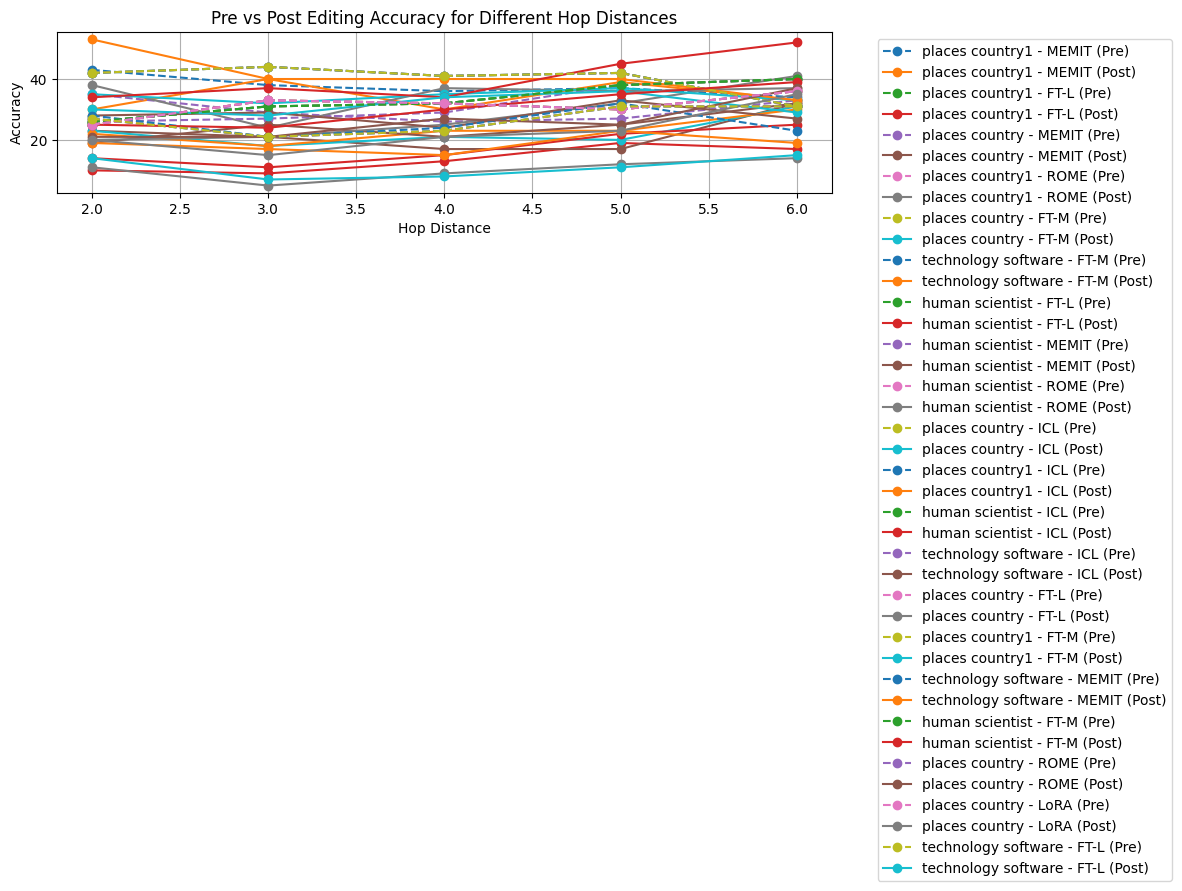

In [ ]:
# df, df_multi_hop = summarize_results("../results/meta_llama_3.1_8b_instruct")
plt.figure(figsize=(12, 6))

for index, row in df_multi_hop.iterrows():
    label = f"{row['topic']} - {row['edit_method']}"
    
    pre_values = [row[f'questions_{i}hop_pre'] for i in range(2, 7)]
    post_values = [row[f'questions_{i}hop_post'] for i in range(2, 7)]
    
    plt.plot(range(2, 7), pre_values, marker='o', linestyle='--', label=f"{label} (Pre)")
    plt.plot(range(2, 7), post_values, marker='o', label=f"{label} (Post)")

plt.xlabel('Hop Distance')
plt.ylabel('Accuracy')
plt.title('Pre vs Post Editing Accuracy for Different Hop Distances')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

In [44]:
df_domain.domain.nunique(), df_domain.columns

(9,
 Index(['domain', 'edit_method', 'questions_2hop_pre', 'questions_2hop_post',
        'questions_3hop_pre', 'questions_3hop_post', 'questions_4hop_pre',
        'questions_4hop_post', 'questions_5hop_pre', 'questions_5hop_post',
        'questions_6hop_pre', 'questions_6hop_post'],
       dtype='object'))

plot the df_domain to line charts with 3 by 3 subplot, each for one domain, each subplot shows 2 (pre- and post- score) * 7 edit_method = 14 lines.
since all the pre- scores with dashed lines are overlapping, using only 1 color for the pre- socre for 7 methods. Also only show 1 legend in the center top part because they are all the same for 9 subplots

In [29]:
df

domain      topic edit_method  efficacy_pre  efficacy_post  \
0           art  sculpture        FT-L           0.0           17.0   
1           art  sculpture        FT-M           0.0           52.0   
2           art  sculpture       GRACE           0.0          100.0   
3           art  sculpture         ICL           0.0           89.0   
4           art  sculpture        LoRA           0.0           78.0   
..          ...        ...         ...           ...            ...   
177  technology   software       GRACE           0.0          100.0   
178  technology   software         ICL           0.0           99.0   
179  technology   software        LoRA           0.0           96.0   
180  technology   software       MEMIT           0.0           81.0   
181  technology   software        ROME           0.0           77.0   

     rephrase_pre  rephrase_post  yes_pre  yes_post  no_pre  no_post  mc_pre  \
0            14.0           20.0     50.0       6.0    31.0      7.0    58.0   
1            14.0           52.0     50.0      49.0    31.0     31.0    58.0   
2            14.0            0.0     50.0       1.0    31.0      2.0    58.0   
3            14.0           92.0     50.0      85.0    31.0     75.0    58.0   
4            14.0           80.0     50.0      13.0    31.0      9.0    58.0   
..            ...            ...      ...       ...     ...      ...     ...   
177          15.0            0.0     63.0       4.0    25.0      3.0    55.0   
178          15.0           98.0     63.0      98.0    25.0     75.0    55.0   
179          15.0           97.0     63.0      19.0    25.0      8.0    55.0   
180          15.0           78.0     63.0      83.0    25.0     38.0    55.0   
181          15.0           80.0     63.0      85.0    25.0     44.0    55.0   

     mc_post  reversed_pre  reversed_post  locality_post  
0       30.0          10.0            1.0            2.0  
1       58.0          10.0            8.0           70.0  
2        3.0          10.0            0.0           19.0  
3       92.0          10.0           63.0           46.0  
4       58.0          10.0            0.0            5.0  
..       ...           ...            ...            ...  
177     21.0           5.0            0.0           44.0  
178     87.0           5.0           74.0           57.0  
179     52.0           5.0            1.0            4.0  
180     75.0           5.0            0.0           14.0  
181     75.0           5.0            1.0           21.0  

[182 rows x 16 columns]

In [30]:
df_multi_hop

domain      topic edit_method  questions_2hop_pre  \
0           art  sculpture        FT-L                31.0   
1           art  sculpture        FT-M                31.0   
2           art  sculpture       GRACE                31.0   
3           art  sculpture         ICL                31.0   
4           art  sculpture        LoRA                31.0   
..          ...        ...         ...                 ...   
177  technology   software       GRACE                27.0   
178  technology   software         ICL                27.0   
179  technology   software        LoRA                27.0   
180  technology   software       MEMIT                27.0   
181  technology   software        ROME                27.0   

     questions_2hop_post  questions_3hop_pre  questions_3hop_post  \
0                    6.0                37.0                  2.0   
1                   40.0                37.0                 38.0   
2                    0.0                37.0                  0.0   
3                   44.0                37.0                 38.0   
4                   19.0                37.0                  8.0   
..                   ...                 ...                  ...   
177                  0.0                20.0                  0.0   
178                 25.0                20.0                 25.0   
179                 14.0                20.0                  8.0   
180                 20.0                20.0                 12.0   
181                 22.0                19.0                 15.0   

     questions_4hop_pre  questions_4hop_post  questions_5hop_pre  \
0                  43.0                  1.0                39.0   
1                  43.0                 45.0                39.0   
2                  43.0                  2.0                39.0   
3                  43.0                 42.0                39.0   
4                  43.0                  5.0                39.0   
..                  ...                  ...                 ...   
177                16.0                  0.0                23.0   
178                16.0                 22.0                23.0   
179                16.0                  5.0                23.0   
180                16.0                 15.0                23.0   
181                16.0                 13.0                23.0   

     questions_5hop_post  questions_6hop_pre  questions_6hop_post  
0                    2.0                45.0                  4.0  
1                   35.0                45.0                 42.0  
2                    1.0                45.0                  0.0  
3                   42.0                45.0                 45.0  
4                    5.0                45.0                  6.0  
..                   ...                 ...                  ...  
177                  0.0                24.0                  0.0  
178                 24.0                24.0                 27.0  
179                  5.0                24.0                  8.0  
180                 13.0                24.0                 21.0  
181                 15.0                24.0                 26.0  

[182 rows x 13 columns]

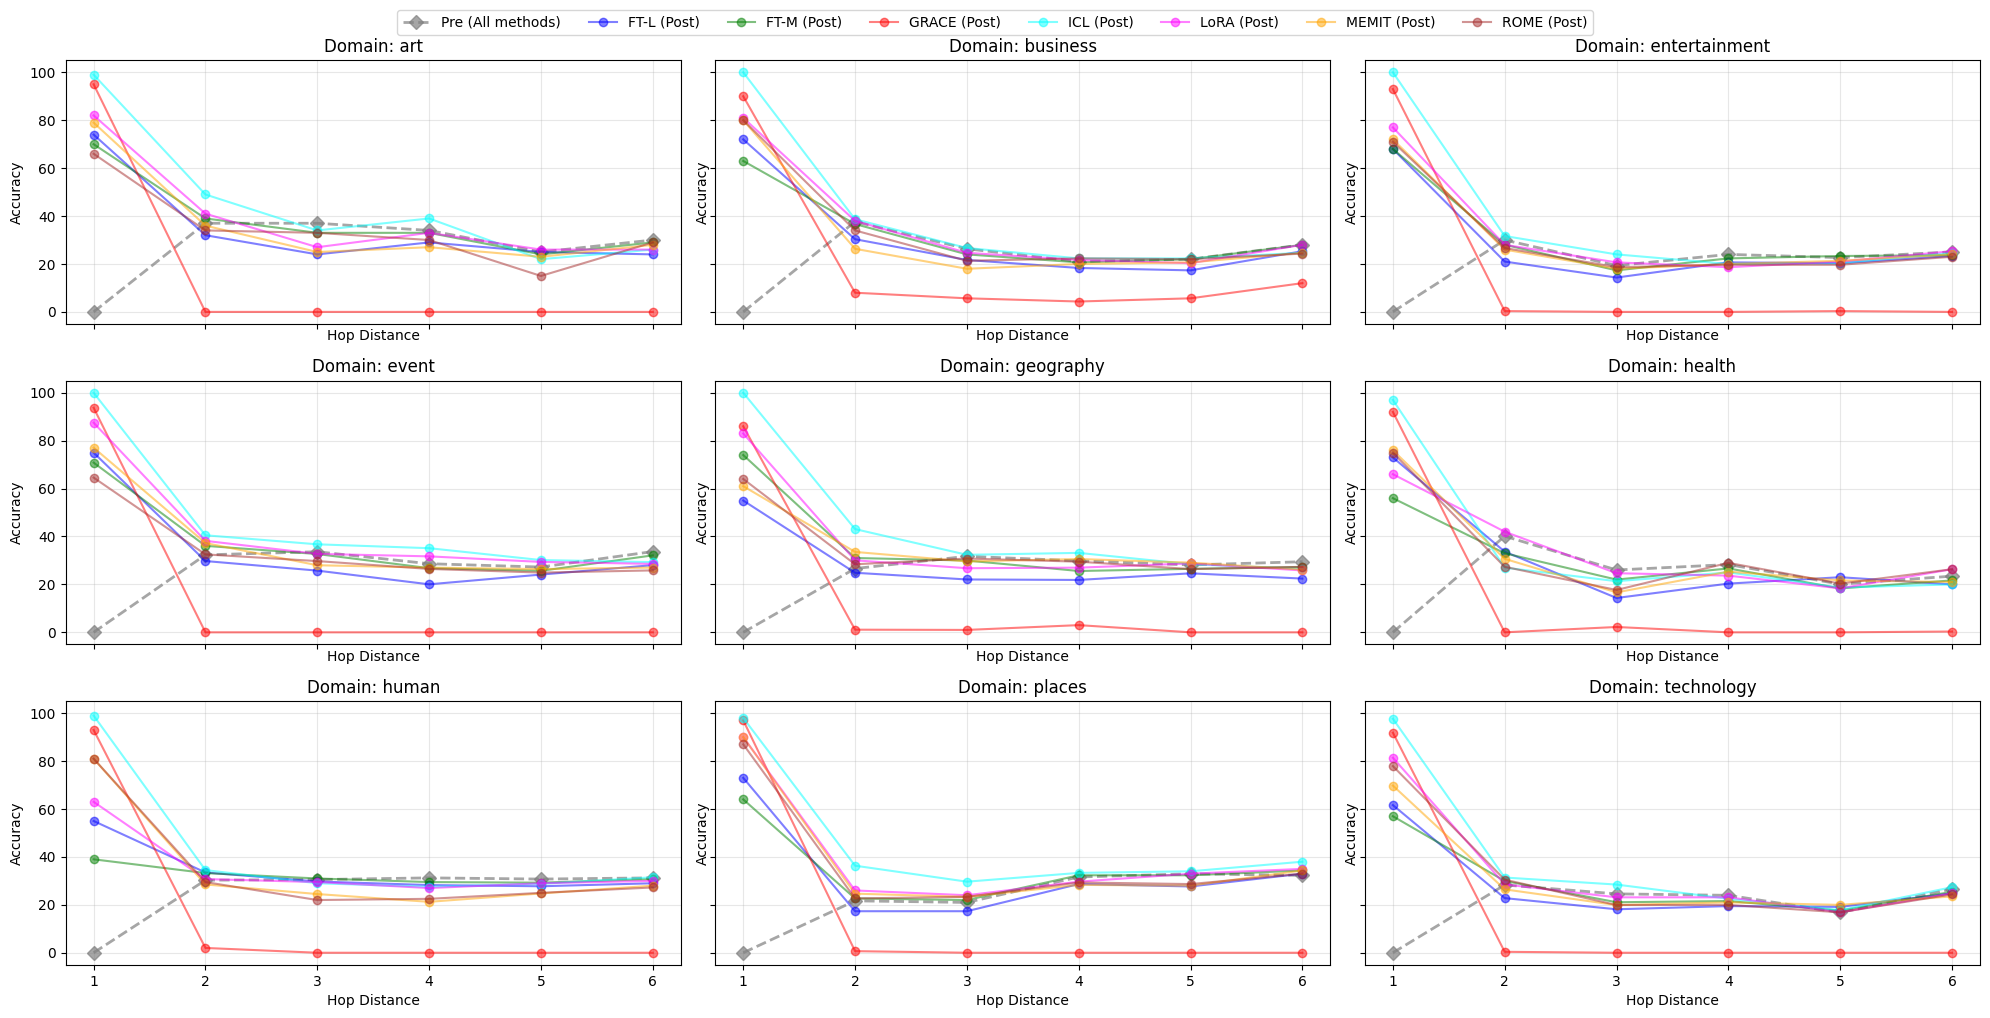

In [16]:
def plot_multi_hop(df, df_multi_hop, name):
    df_domain = df_multi_hop.groupby(['domain', 'edit_method']).mean().reset_index()

    # Merge df with df_domain to include efficacy columns
    df_domain = df_domain.merge(df[['domain', 'edit_method', 'efficacy_pre', 'efficacy_post']], 
                                on=['domain', 'edit_method'], how='left')

    # Set up the subplot grid
    fig, axes = plt.subplots(3, 3, figsize=(20, 10), sharex=True, sharey=True)

    # Get unique domains and edit methods
    domains = df_domain['domain'].unique()
    edit_methods = df_domain['edit_method'].unique()

    # Color palette for edit methods (post-editing)
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'orange', 'brown']

    # Create a single legend for the entire figure
    lines = []
    labels = []

    for i, domain in enumerate(domains):
        row = i // 3
        col = i % 3
        ax = axes[row, col]
        domain_data = df_domain[df_domain['domain'] == domain]
        
        ax.grid(True, zorder=-1, alpha=0.3)
        
        # Plot pre-editing scores (all methods in one color)
        pre_values = [domain_data['efficacy_pre'].mean()] + [domain_data[f'questions_{k}hop_pre'].mean() for k in range(2, 7)]
        pre_line, = ax.plot(range(1, 7), pre_values, marker='D', linestyle='--', color='gray', label='Pre (All methods)', linewidth=2, alpha=0.7, zorder=2, markersize=7)
        
        if i == 0:
            lines.append(pre_line)
            labels.append('Pre (All methods)')
        
        for j, method in enumerate(edit_methods):
            method_data = domain_data[domain_data['edit_method'] == method]
            post_values = [method_data['efficacy_post'].values[0]] + [method_data[f'questions_{k}hop_post'].values[0] for k in range(2, 7)]
            post_line, = ax.plot(range(1, 7), post_values, marker='o', color=colors[j], label=f"{method} (Post)", zorder=2, alpha=0.5)
            
            if i == 0:
                lines.append(post_line)
                labels.append(f"{method} (Post)")
        
        ax.set_xlabel('Hop Distance')
        ax.set_ylabel('Accuracy')
        ax.set_title(f'Domain: {domain}')
        ax.set_xticks(range(1, 7))
        ax.set_xticklabels(['1', '2', '3', '4', '5', '6'])
        
        ax.set_axisbelow(True)

    # Remove any unused subplots
    for i in range(len(domains), 9):
        row = i // 3
        col = i % 3
        fig.delaxes(axes[row, col])

    # Add a single legend to the center top of the figure
    fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=8)

    plt.tight_layout()
    
    plt.savefig(f'../results/figs/plot_multi_hop_{name}.pdf', bbox_inches='tight')
    
    plt.show()

df, df_multi_hop = summarize_results("../results/llama_2_7b_chat_hf")
plot_multi_hop(df, df_multi_hop, 'llama_2_7b')

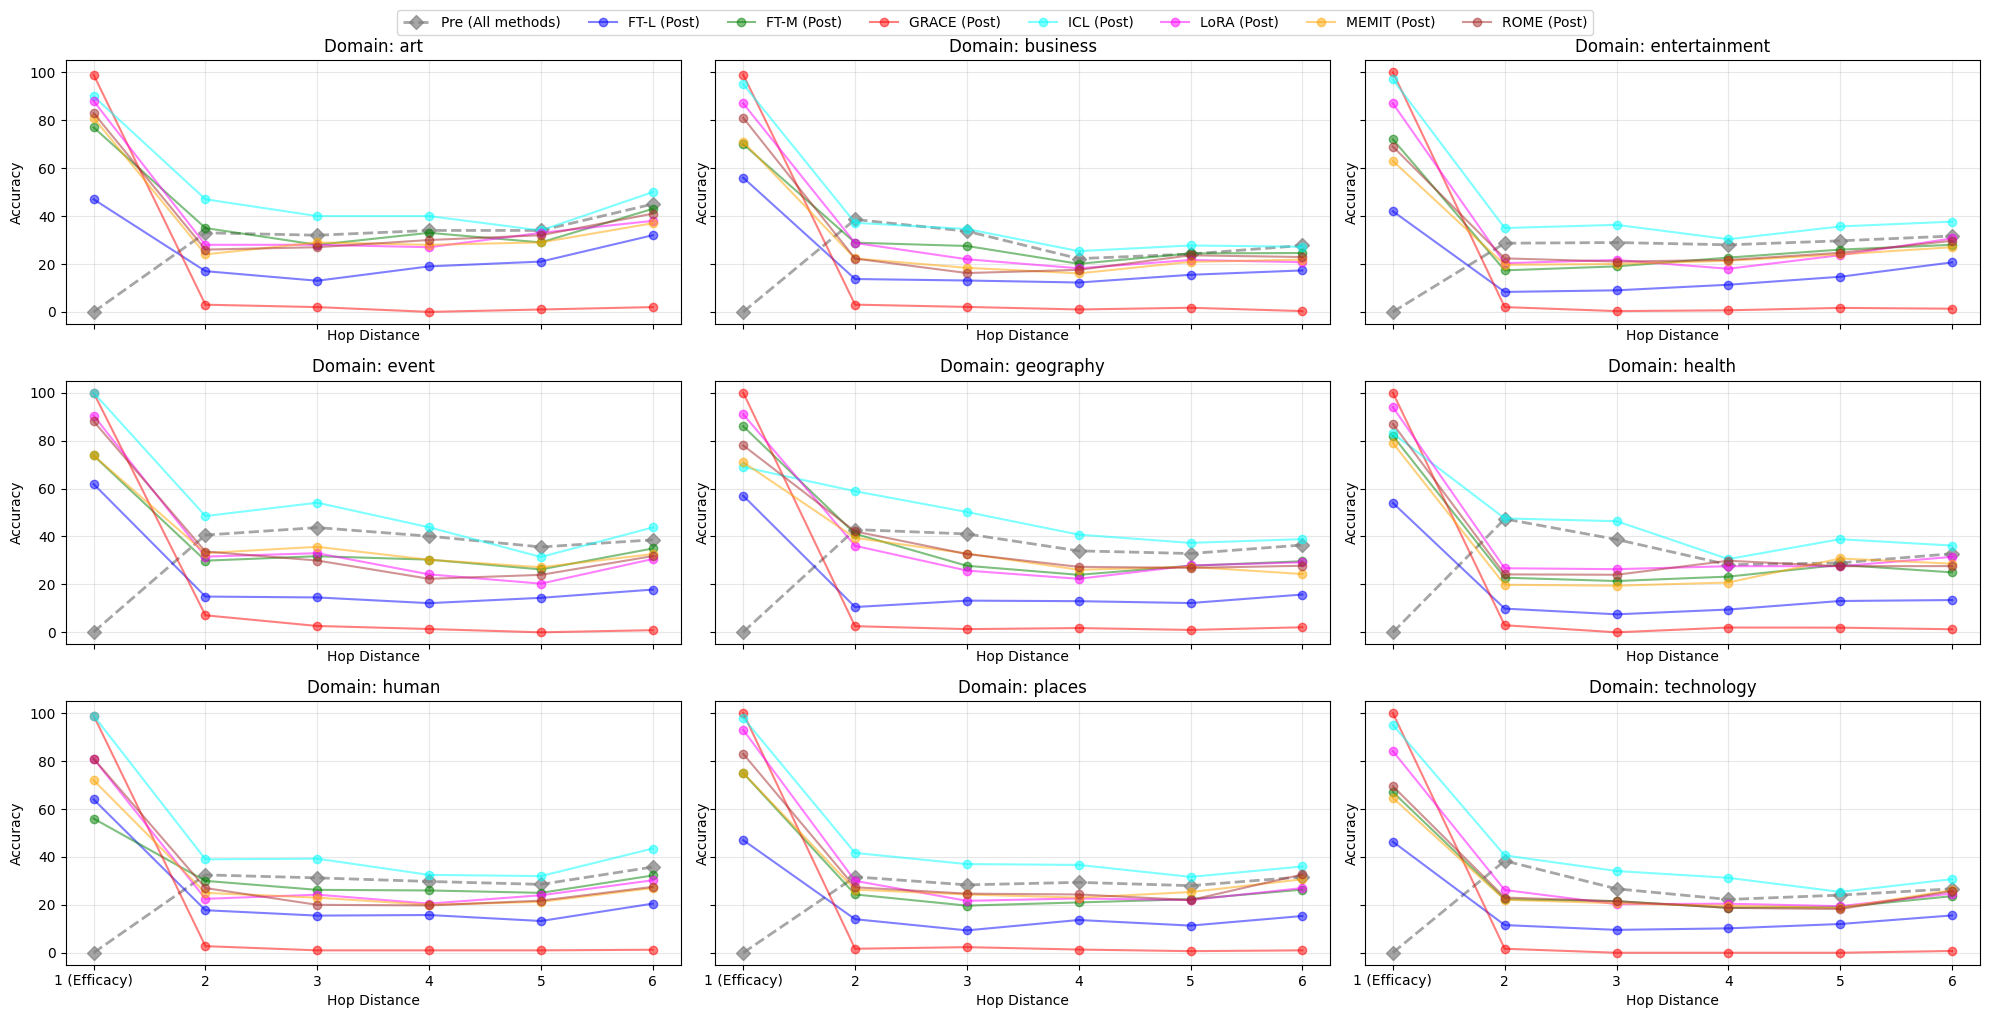

In [ ]:
df, df_multi_hop = summarize_results("../results/meta_llama_3_8b_instruct")
plot_multi_hop(df, df_multi_hop, 'llama_3_8b')

In [33]:
df, df_multi_hop = summarize_results("../results/mistral_7b_instruct_v0.3")
plot_multi_hop(df, df_multi_hop, 'mistral_7b')

In [ ]:
# df, df_multi_hop = summarize_results("../results/meta_llama_3_8b_instruct")
plt.figure(figsize=(12, 6))

for index, row in df_multi_hop.iterrows():
    label = f"{row['topic']} - {row['edit_method']}"
    
    pre_values = [row[f'questions_{i}hop_pre'] for i in range(2, 7)]
    post_values = [row[f'questions_{i}hop_post'] for i in range(2, 7)]
    
    plt.plot(range(2, 7), pre_values, marker='o', linestyle='--', label=f"{label} (Pre)")
    plt.plot(range(2, 7), post_values, marker='o', label=f"{label} (Post)")

plt.xlabel('Hop Distance')
plt.ylabel('Accuracy')
plt.title('Pre vs Post Editing Accuracy for Different Hop Distances')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

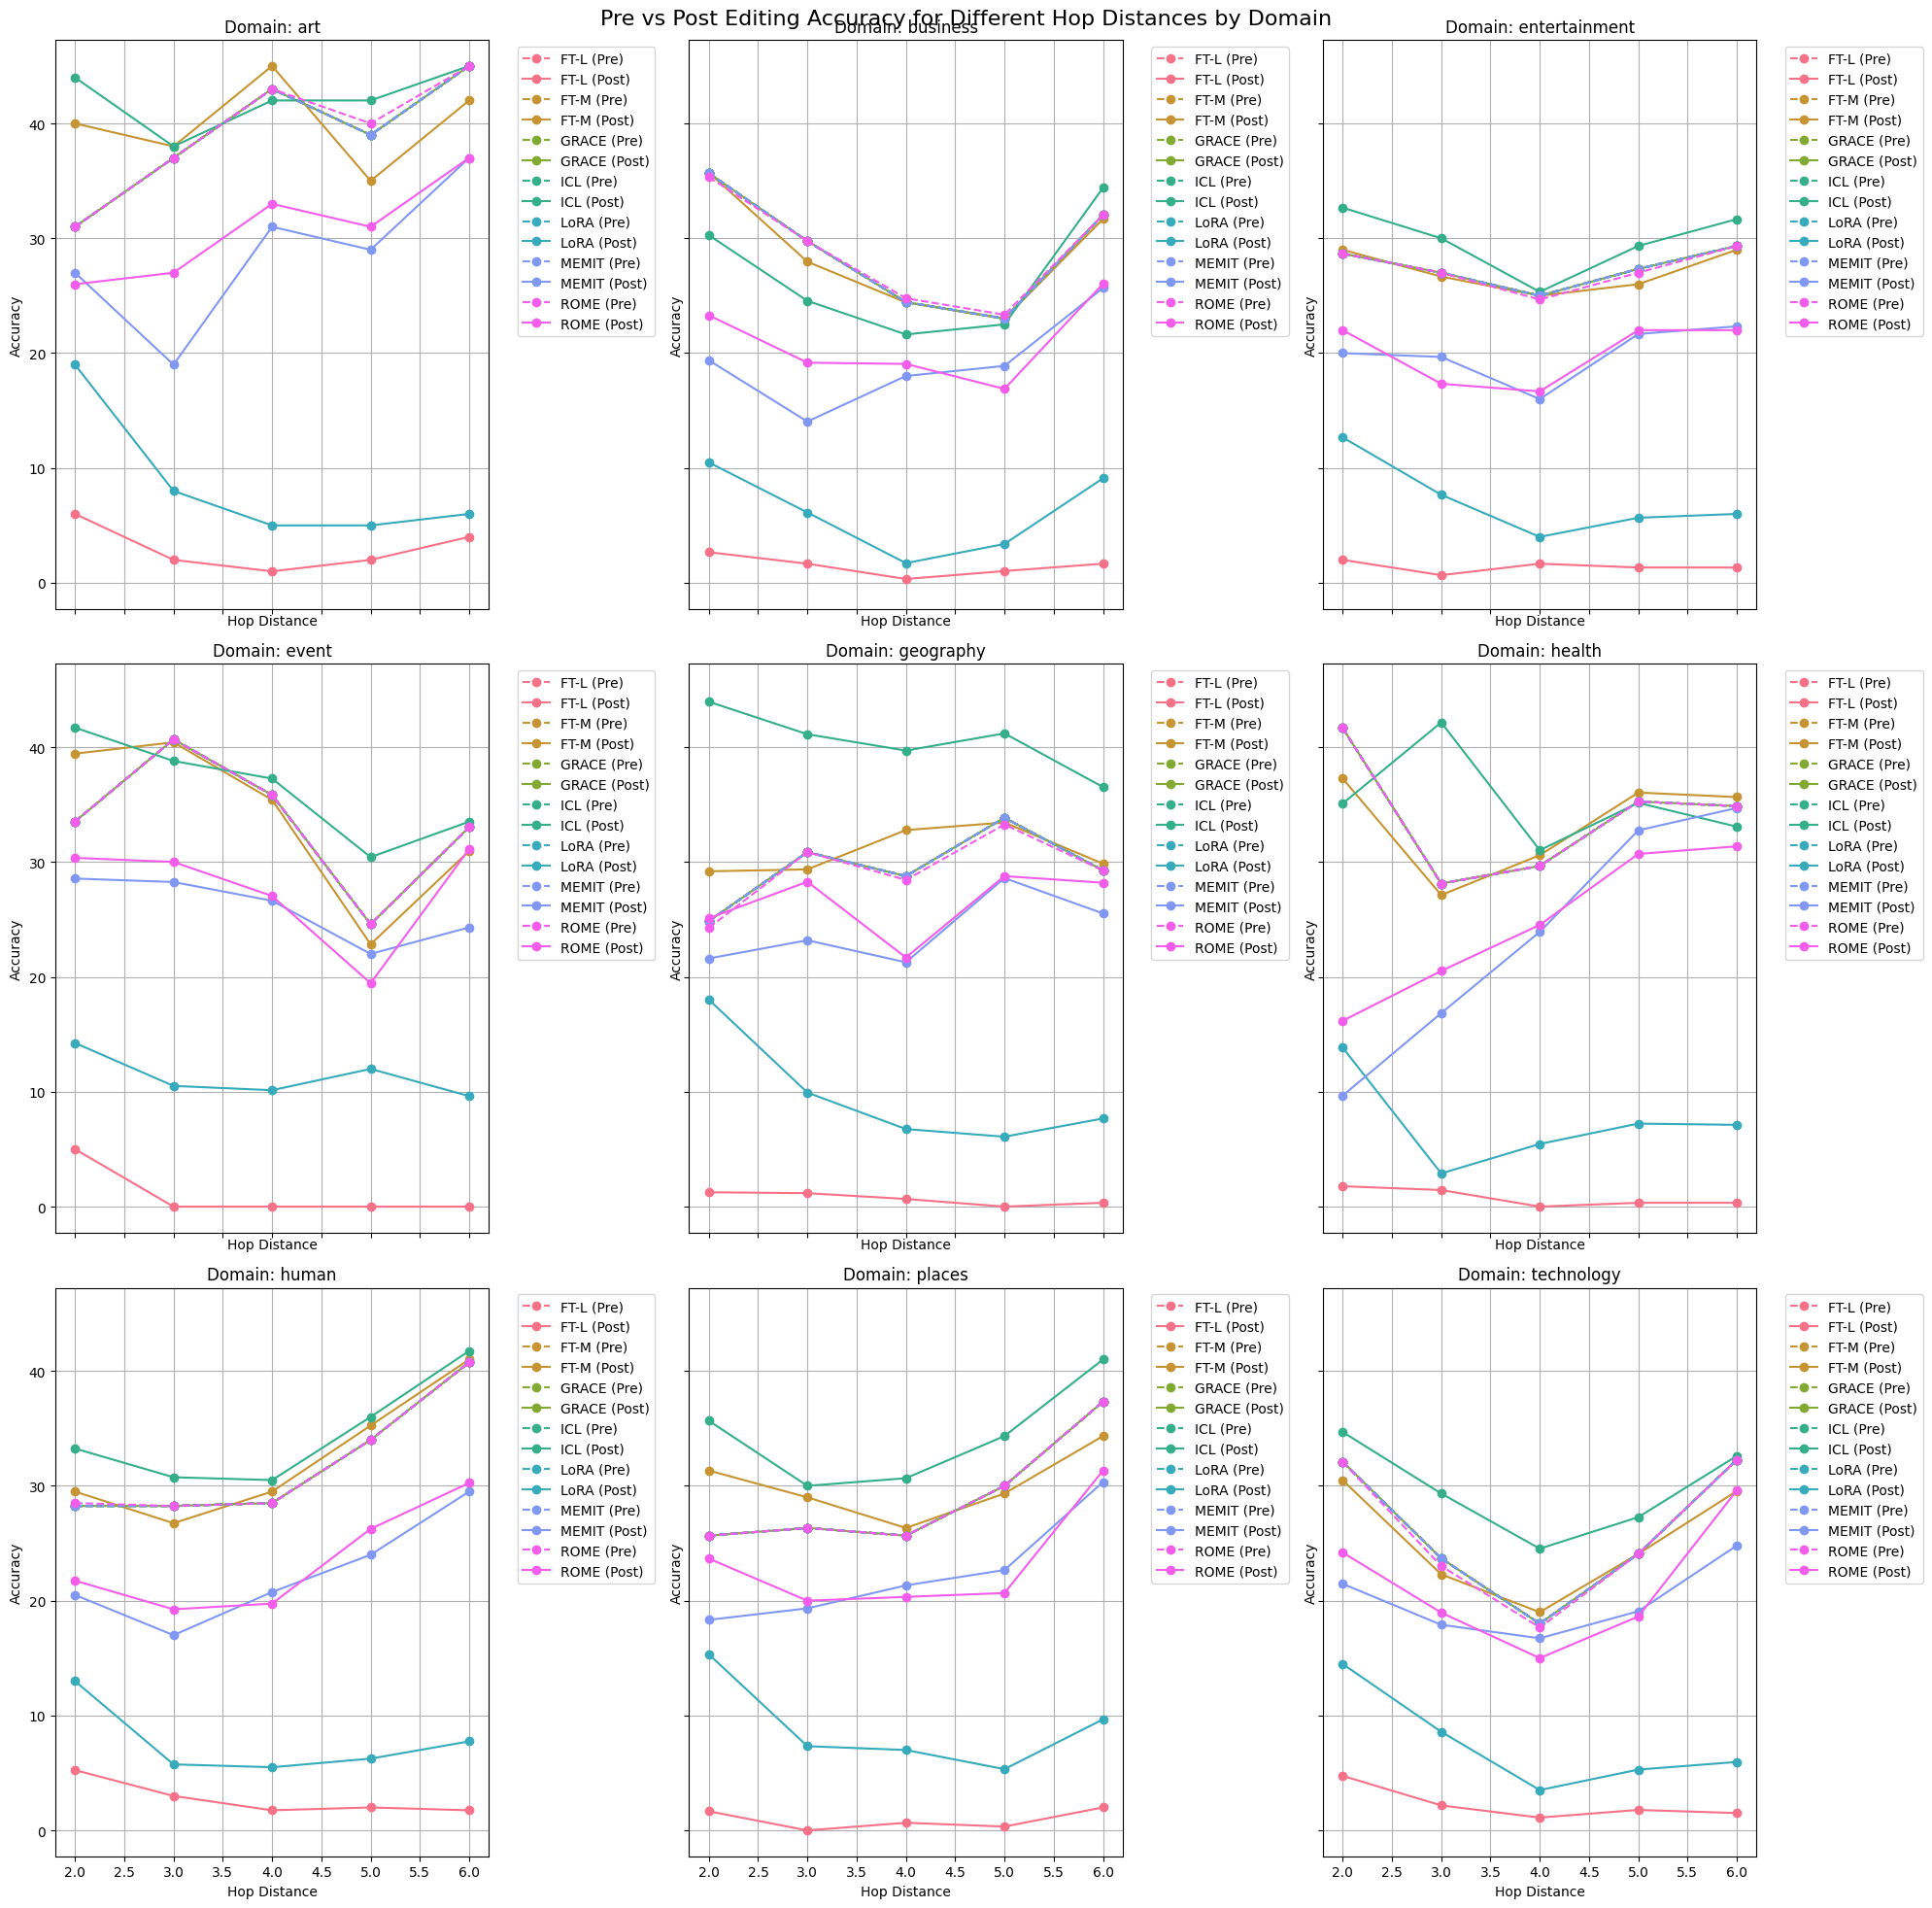

In [ ]:
# df, df_multi_hop = summarize_results("../results/meta_llama_3_8b_instruct")
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Group by domain and calculate mean for each hop
df_domain = df_multi_hop.groupby(['domain', 'edit_method']).mean().reset_index()

# Get unique domains and edit methods
domains = df_domain['domain'].unique()
edit_methods = df_domain['edit_method'].unique()

# Set up the subplot grid
n_rows, n_cols = 3, 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20), sharex=True, sharey=True)
fig.suptitle('Pre vs Post Editing Accuracy for Different Hop Distances by Domain', fontsize=16)

# Color palette for edit methods
colors = sns.color_palette("husl", n_colors=len(edit_methods))

for i, domain in enumerate(domains):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    domain_data = df_domain[df_domain['domain'] == domain]
    
    for j, method in enumerate(edit_methods):
        method_data = domain_data[domain_data['edit_method'] == method]
        
        pre_values = [method_data[f'questions_{k}hop_pre'].values[0] for k in range(2, 7)]
        post_values = [method_data[f'questions_{k}hop_post'].values[0] for k in range(2, 7)]
        
        ax.plot(range(2, 7), pre_values, marker='o', linestyle='--', color=colors[j], label=f"{method} (Pre)")
        ax.plot(range(2, 7), post_values, marker='o', color=colors[j], label=f"{method} (Post)")
    
    ax.set_xlabel('Hop Distance')
    ax.set_ylabel('Accuracy')
    ax.set_title(f'Domain: {domain}')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True)

# Remove any unused subplots
for i in range(len(domains), n_rows * n_cols):
    row = i // n_cols
    col = i % n_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

## Misc

In [ ]:
def summarize_results_simple(json_folder, std_flag=False):
    metrics_ls, metrics_ls_multi_hop = [], []

    for filename in os.listdir(json_folder):
        if filename.endswith('GRACE.json') and 'multi_turn' not in filename:
            filepath = os.path.join(json_folder, filename)
            with open(filepath, 'r') as file:
                metrics = json.load(file)
                topic, edit_method = ' '.join(filename.split('_')[:2]), filename.split('_')[2:][0].replace('.json', '')
                results = {
                    "topic": topic,
                    "edit_method": edit_method,
                    "efficacy_pre": get_avg_std([e['pre']['edit_acc'][0] for e in metrics]),
                    "efficacy_post": get_avg_std([e['post']['edit_acc'][0] for e in metrics]),
                }
                metrics_ls.append(results)
    df = pd.DataFrame(metrics_ls)
    return df
df = summarize_results_simple('../tmp')
df

In [ ]:
with open('../tmp/human_scientist_GRACE.json', 'r') as file:
    metrics = json.load(file)
    results_ls = []
    for e in metrics:
        results = {
            "efficacy_post": e['post']['edit_acc'][0],
            "pre_output": e['pre']['edit_output'][0],
            "post_output": e['post']['edit_output'][0],
            "ground_truth": e['requested_edit']['target_new'],
        }
        results_ls.append(results)
tmp = pd.DataFrame(results_ls)
tmp

In [62]:
tmp[tmp['pre_output'] != tmp['post_output']].shape

(0, 4)

## Dumbbell plot

In [20]:
df, df_multi_hop = summarize_results("../results/meta_llama_3_8b_instruct")

In [ ]:
df[df['edit_method']=='GRACE']

topic edit_method  efficacy_pre  efficacy_post  \
2                      art sculpture       GRACE          3.00          99.00   
9                     business brand       GRACE          2.00         100.00   
16              business corporation       GRACE          0.00          98.89   
23                 business industry       GRACE          6.12         100.00   
30               entertainment anime       GRACE          1.00         100.00   
37         entertainment music genre       GRACE          8.00          99.00   
44                entertainment song       GRACE          0.00          97.00   
51                        event film       GRACE          0.00         100.00   
58                     event history       GRACE          5.71          97.14   
65                       event sport       GRACE          2.70         100.00   
72                  geography forest       GRACE          0.00         100.00   
79                 geography glacier       GRACE          0.00         100.00   
86                 geography volcano       GRACE          0.00          84.00   
93                    health disease       GRACE          3.00         100.00   
100                health medication       GRACE          4.00         100.00   
107                   health symptom       GRACE          0.00         100.00   
114                    human athlete       GRACE          0.00          99.00   
121               human entrepreneur       GRACE          0.00         100.00   
128                  human scientist       GRACE          1.00         100.00   
135                     human writer       GRACE          0.00         100.00   
142                      places city       GRACE          1.00         100.00   
149                   places country       GRACE          0.00         100.00   
156                  places landmark       GRACE          4.00         100.00   
163              technology database       GRACE          0.00         100.00   
170  technology programming language       GRACE          0.00         100.00   
177              technology software       GRACE          2.00          99.00   

     rephrase_pre  rephrase_post  yes_pre  yes_post  no_pre  no_post  mc_pre  \
2            4.00           3.00    61.00     61.00   26.00    26.00   34.00   
9            2.00           3.00    62.00     62.00   22.00    22.00   27.00   
16           0.00           0.00    62.22     62.22   14.44    14.44   27.78   
23          13.27          14.29    88.78     88.78   26.53    26.53   31.63   
30           3.00           3.00    63.00     63.00   22.00    22.00   24.00   
37           5.00           6.00    80.00     80.00   23.00    23.00   38.00   
44           0.00           0.00    73.00     73.00   24.00    24.00   33.00   
51           4.76           4.76    52.38     52.38   23.81    23.81   33.33   
58           2.86           2.86    71.43     71.43   15.71    15.71   34.29   
65           2.70           2.70    72.97     72.97   32.43    32.43   45.95   
72           2.00           2.00    86.00     86.00   26.00    26.00   53.00   
79           0.00           1.67    80.00     80.00   20.00    20.00   61.67   
86           2.00           1.00    64.00     64.00   33.00    33.00   45.00   
93           1.00           1.00    53.00     53.00   28.00    28.00   26.00   
100          0.00           0.00    84.00     84.00   20.00    20.00   32.00   
107          3.85           3.85    46.15     46.15   42.31    42.31   38.46   
114          0.00           0.00    70.00     70.00   20.00    20.00   42.00   
121          0.00           0.00    79.00     79.00   21.00    21.00   32.00   
128          3.00           1.00    80.00     80.00   30.00    30.00   45.00   
135          2.00           1.00    66.00     66.00   22.00    22.00   40.00   
142          1.00           2.00    39.00     39.00   48.00    48.00   36.00   
149          2.00           0.00    61.00     61.00   42.00    42.00   51.00   
156

In [46]:
df.columns

Index(['topic', 'edit_method', 'efficacy_pre', 'efficacy_post', 'rephrase_pre',
       'rephrase_post', 'yes_pre', 'yes_post', 'no_pre', 'no_post', 'mc_pre',
       'mc_post', 'reversed_pre', 'reversed_post', 'locality_post'],
      dtype='object')

Draw a dumbbell dot plot:
Across the x-axis there are 6 blocks: 'efficacy', 'rephrase',  'yes', 'no', 'mc', 'reversed'. Within each block use 7 colors for 7 edit methods.
y-axis show each metric value in a vertical dumbbell dot plot, which one dot for pre- and one for post- metric.
the input dataframe has following columns: 'topic', 'edit_method', 'efficacy_pre', 'efficacy_post', 'rephrase_pre', 'rephrase_post', 'yes_pre', 'yes_post', 'no_pre', 'no_post', 'mc_pre', 'mc_post', 'reversed_pre', 'reversed_post'

In [48]:
df.head()

topic edit_method  efficacy_pre  efficacy_post  rephrase_pre  \
0  business brand        FT-L           0.0           56.0          12.0   
1  business brand        FT-M           0.0           70.0          12.0   
2  business brand       GRACE           2.0          100.0           2.0   
3  business brand         ICL           0.0           95.0          12.0   
4  business brand        LoRA           0.0           87.0          12.0   

   rephrase_post  yes_pre  yes_post  no_pre  no_post  mc_pre  mc_post  \
0           52.0     62.0      51.0    22.0     14.0    27.0     28.0   
1           66.0     62.0      63.0    22.0     19.0    27.0     27.0   
2            3.0     62.0      62.0    22.0     22.0    27.0     27.0   
3           91.0     62.0      89.0    22.0     67.0    27.0     88.0   
4           85.0     62.0      68.0    22.0     20.0    27.0     56.0   

   reversed_pre  reversed_post  locality_post  
0          14.0            5.0           15.0  
1          14.0            6.0           48.0  
2          14.0           14.0          100.0  
3          14.0           73.0           58.0  
4          14.0           11.0           40.0

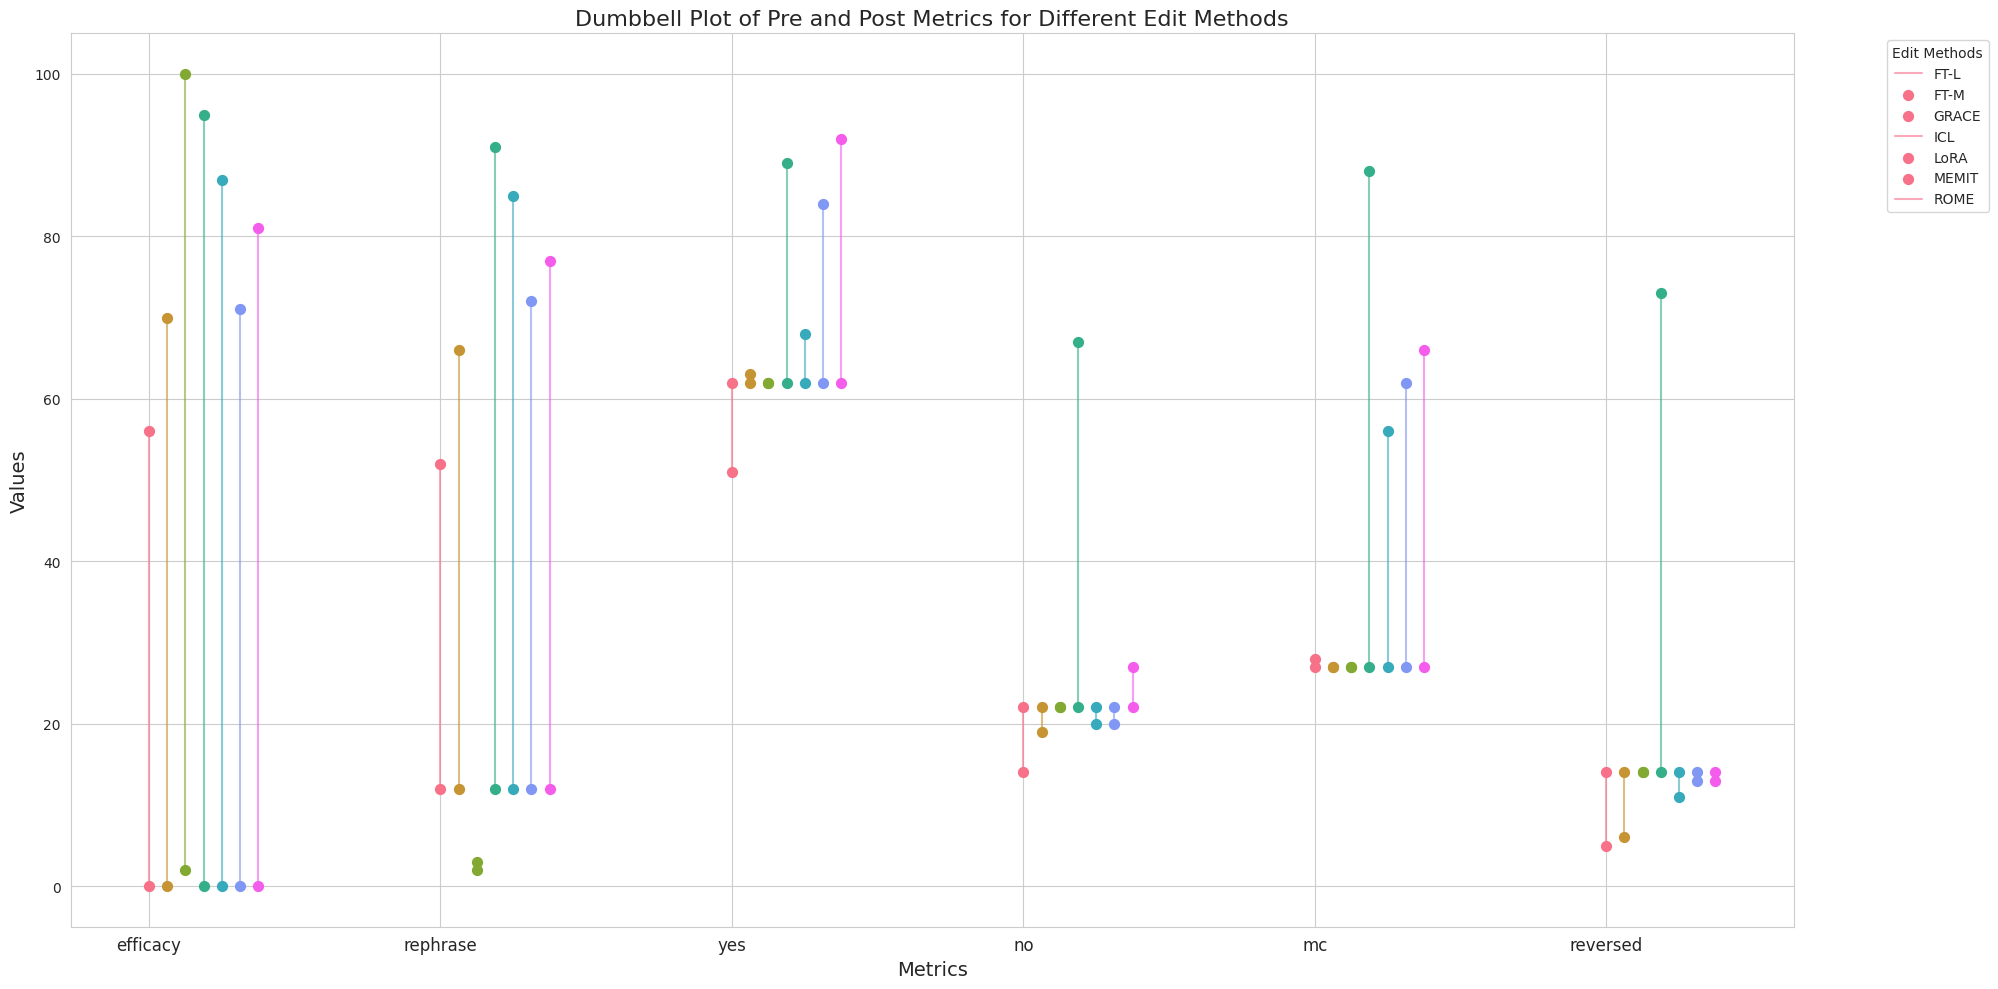

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_dumbbell(df):
    # Set up the plot
    plt.figure(figsize=(20, 10))
    sns.set_style("whitegrid")

    # Define colors for each edit method
    colors = sns.color_palette("husl", 7)
    edit_methods = df['edit_method'].unique()

    # Define the metrics and their positions on x-axis
    metrics = ['efficacy', 'rephrase', 'yes', 'no', 'mc', 'reversed']
    x_positions = [i * 4 for i in range(len(metrics))]

    # Plot dumbbell for each edit method and metric
    for i, method in enumerate(edit_methods):
        method_data = df[df['edit_method'] == method]
        
        for j, metric in enumerate(metrics):
            pre_col = f'{metric}_pre'
            post_col = f'{metric}_post'
            
            if pre_col in method_data.columns and post_col in method_data.columns:
                pre_value = method_data[pre_col].values[0]
                post_value = method_data[post_col].values[0]
                
                plt.plot([x_positions[j] + i * 0.25, x_positions[j] + i * 0.25], 
                        [pre_value, post_value], 
                        color=colors[i], alpha=0.6)
                plt.scatter(x_positions[j] + i * 0.25, pre_value, color=colors[i], s=50, zorder=10)
                plt.scatter(x_positions[j] + i * 0.25, post_value, color=colors[i], s=50, zorder=10)

    # Customize the plot
    plt.xlabel('Metrics', fontsize=14)
    plt.ylabel('Values', fontsize=14)
    plt.title('Dumbbell Plot of Pre and Post Metrics for Different Edit Methods', fontsize=16)

    # Set x-ticks and labels
    plt.xticks(x_positions, metrics, fontsize=12)

    # Add legend
    plt.legend(edit_methods, title='Edit Methods', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

plot_dumbbell(df[df['topic'] == 'business brand'])

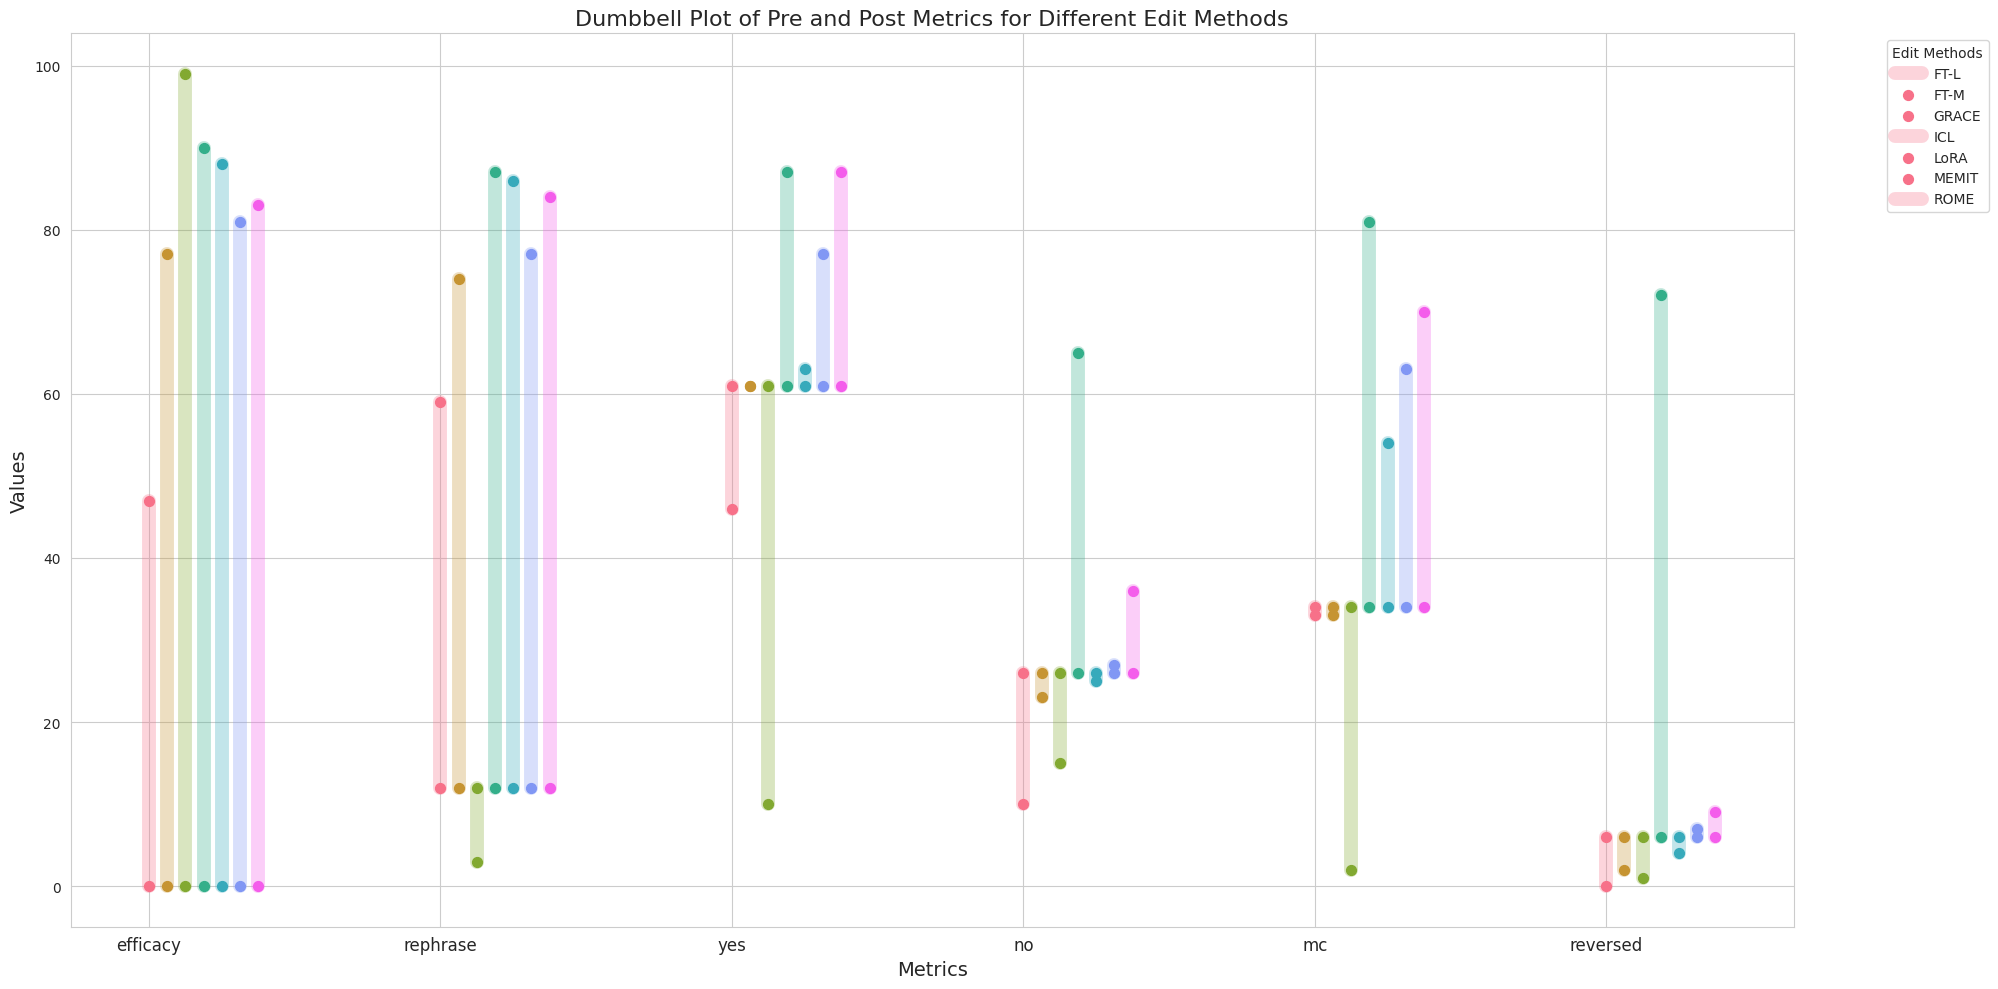

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_dumbbell(df):
    # Set up the plot
    plt.figure(figsize=(20, 10))
    sns.set_style("whitegrid")

    # Define colors for each edit method
    colors = sns.color_palette("husl", 7)
    edit_methods = df['edit_method'].unique()

    # Define the metrics and their positions on x-axis
    metrics = ['efficacy', 'rephrase', 'yes', 'no', 'mc', 'reversed']
    x_positions = [i * 4 for i in range(len(metrics))]

    # Plot dumbbell for each edit method and metric
    for i, method in enumerate(edit_methods):
        method_data = df[df['edit_method'] == method]
        
        for j, metric in enumerate(metrics):
            pre_col = f'{metric}_pre'
            post_col = f'{metric}_post'
            
            if pre_col in method_data.columns and post_col in method_data.columns:
                pre_value = method_data[pre_col].values[0]
                post_value = method_data[post_col].values[0]
                
                plt.plot([x_positions[j] + i * 0.25, x_positions[j] + i * 0.25], 
                        [pre_value, post_value], 
                        color=colors[i], alpha=0.3, linewidth=10)  # Increased linewidth and reduced alpha for transparency
                plt.scatter(x_positions[j] + i * 0.25, pre_value, color=colors[i], s=50, zorder=10)
                plt.scatter(x_positions[j] + i * 0.25, post_value, color=colors[i], s=50, zorder=10)

    # Customize the plot
    plt.xlabel('Metrics', fontsize=14)
    plt.ylabel('Values', fontsize=14)
    plt.title('Dumbbell Plot of Pre and Post Metrics for Different Edit Methods', fontsize=16)

    # Set x-ticks and labels
    plt.xticks(x_positions, metrics, fontsize=12)

    # Add legend
    plt.legend(edit_methods, title='Edit Methods', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

plot_dumbbell(df)

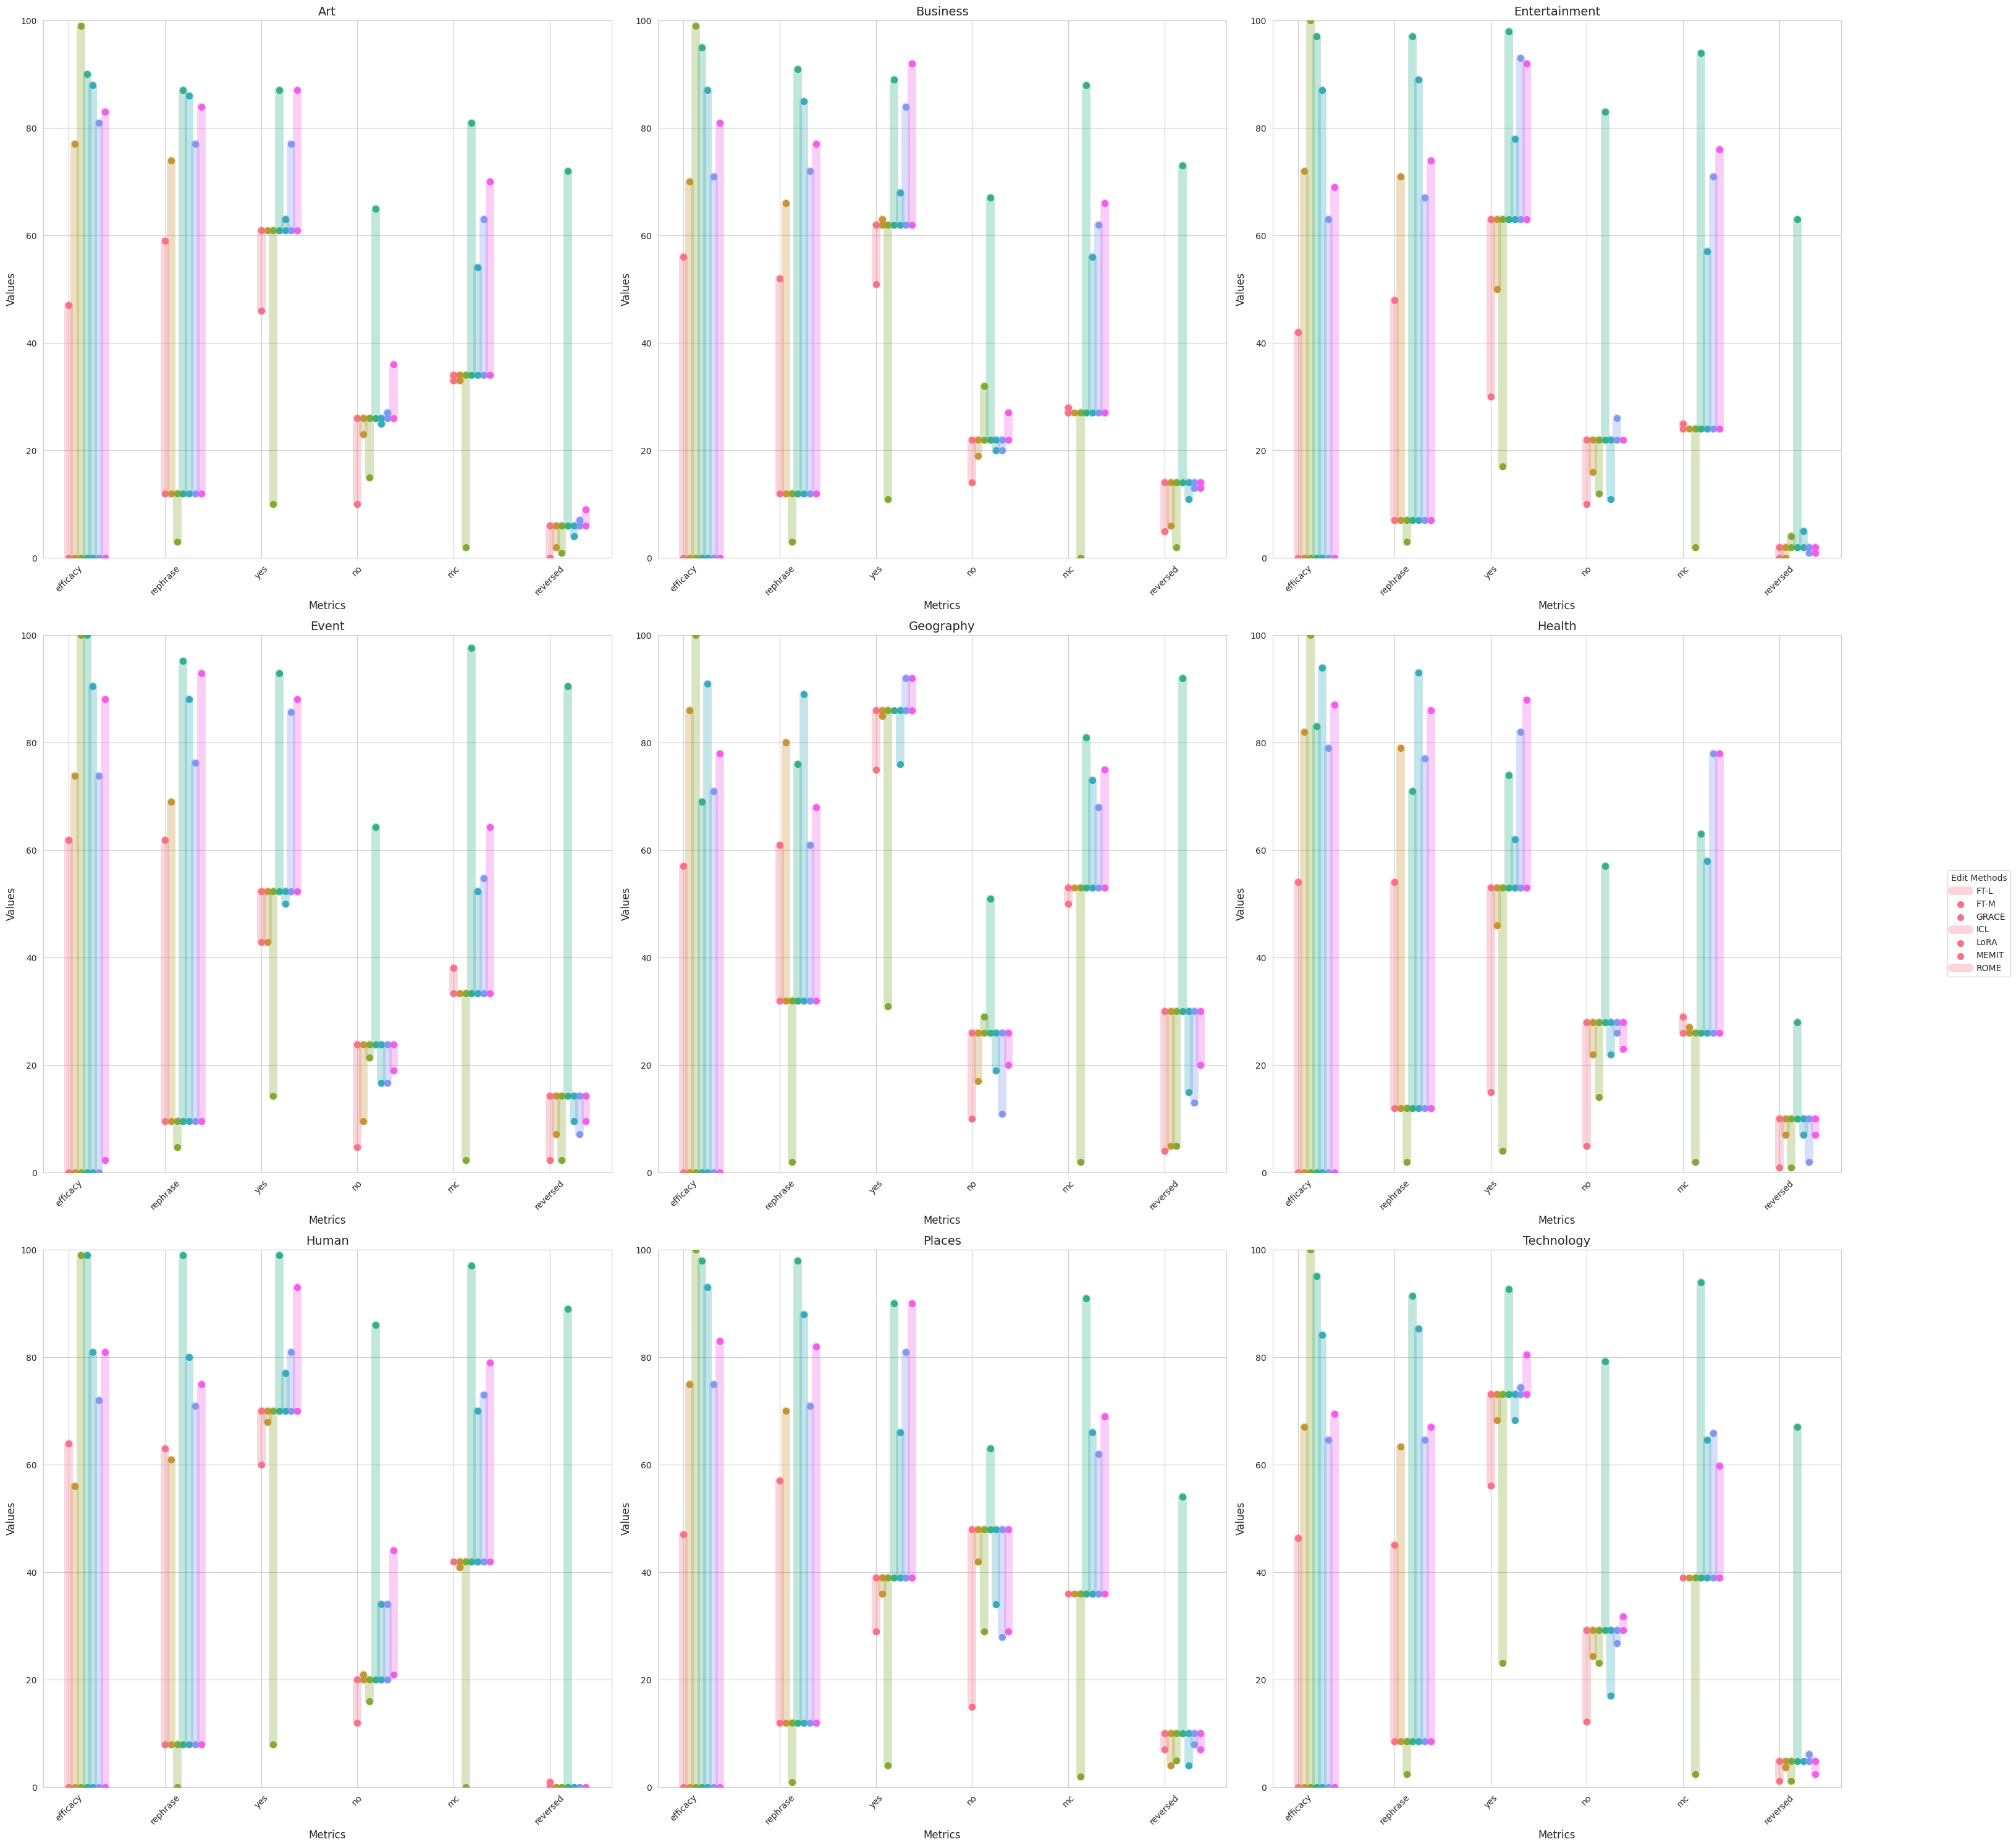

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_dumbbell_by_domain(df):
    # Set up the plot
    fig, axes = plt.subplots(3, 3, figsize=(30, 30))
    # sns.set_style("whitegrid")

    # Define colors for each edit method
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'brown']
    edit_methods = df['edit_method'].unique()

    # Define the metrics and their positions on x-axis
    metrics = ['efficacy', 'rephrase', 'yes', 'no', 'mc', 'reversed']
    x_positions = [i * 4 for i in range(len(metrics))]

    # Get unique domains
    domains = df['domain'].unique()

    for idx, domain in enumerate(domains):
        row = idx // 3
        col = idx % 3
        ax = axes[row, col]

        domain_data = df[df['domain'] == domain]

        # Plot dumbbell for each edit method and metric
        for i, method in enumerate(edit_methods):
            method_data = domain_data[domain_data['edit_method'] == method]
            
            for j, metric in enumerate(metrics):
                pre_col = f'{metric}_pre'
                post_col = f'{metric}_post'
                
                if pre_col in method_data.columns and post_col in method_data.columns:
                    pre_value = method_data[pre_col].values[0]
                    post_value = method_data[post_col].values[0]
                    
                    ax.plot([x_positions[j] + i * 0.25, x_positions[j] + i * 0.25], 
                            [pre_value, post_value], 
                            color=colors[i], alpha=0.3, linewidth=10)
                    ax.scatter(x_positions[j] + i * 0.25, pre_value, color=colors[i], s=50, zorder=10)
                    ax.scatter(x_positions[j] + i * 0.25, post_value, color=colors[i], s=50, zorder=10)

        # Customize the subplot
        ax.set_xlabel('Metrics', fontsize=12)
        ax.set_ylabel('Values', fontsize=12)
        ax.set_title(f'{domain.capitalize()}', fontsize=14)

        # Set x-ticks and labels
        ax.set_xticks(x_positions)
        ax.set_xticklabels(metrics, fontsize=10, rotation=45)

        # Set y-axis limit
        ax.set_ylim(0, 100)

    # Add legend to the figure
    fig.legend(edit_methods, title='Edit Methods', bbox_to_anchor=(1.05, 0.5), loc='center left')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

plot_dumbbell_by_domain(df)

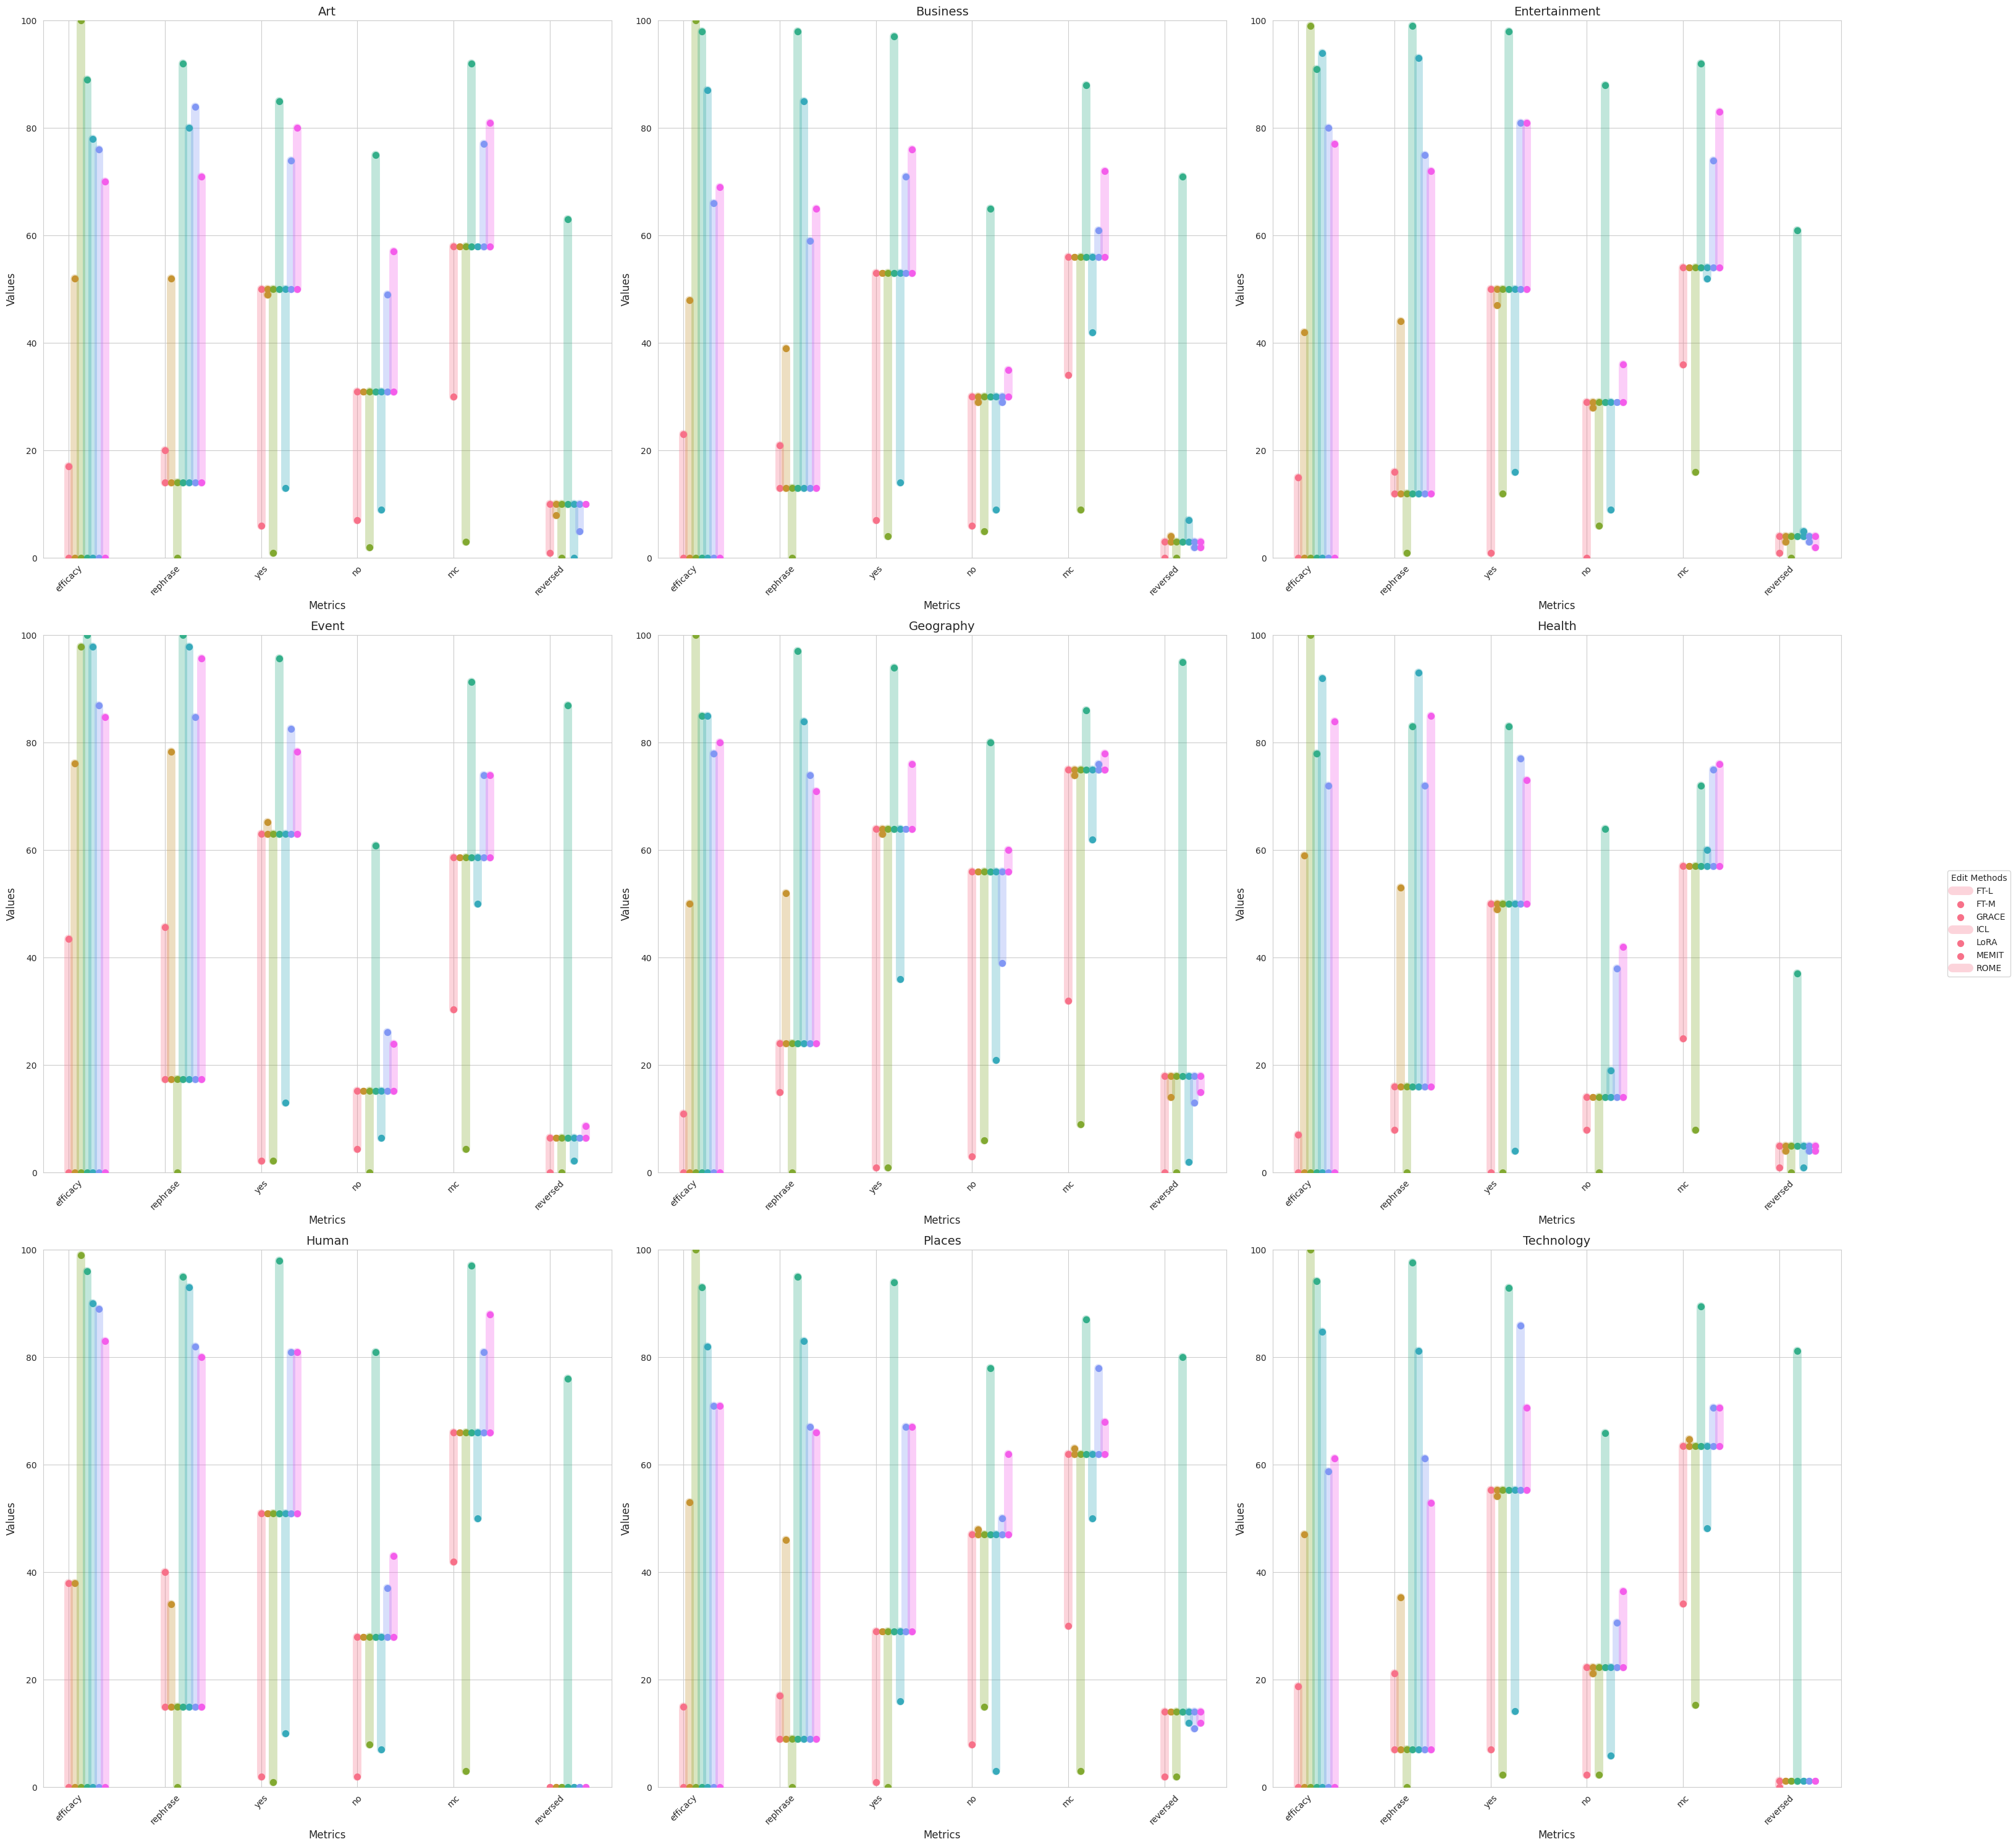

In [26]:
df, df_multi_hop = summarize_results("../results/mistral_7b_instruct_v0.3")
plot_dumbbell_by_domain(df)

In [ ]:
# change dot color to distinguish before and after

In [23]:
df, df_multi_hop = summarize_results("../tmp/all_grace/meta_llama_3_8b_instruct")
df

topic edit_method  efficacy_pre  efficacy_post  \
0  business corporation       GRACE           0.0          98.89   
1           event sport       GRACE           0.0         100.00   
2      geography forest       GRACE           0.0         100.00   
3           places city       GRACE           0.0         100.00   

   rephrase_pre  rephrase_post  yes_pre  yes_post  no_pre  no_post  mc_pre  \
0          5.56            0.0    62.22     62.22   14.44    14.44   27.78   
1         16.22            2.7    72.97     72.97   32.43    32.43   45.95   
2         32.00            2.0    86.00     86.00   26.00    26.00   53.00   
3         12.00            2.0    39.00     39.00   48.00    48.00   36.00   

   mc_post  reversed_pre  reversed_post  locality_post  
0    27.78          4.44           4.44          100.0  
1    45.95         21.62          21.62          100.0  
2    53.00         30.00          30.00          100.0  
3    36.00         10.00          10.00          100.0

In [ ]:
plot_dumbbell(df.mean())